![picture](https://user-images.githubusercontent.com/67597246/115137093-75dd4880-a056-11eb-8564-2a6f33e32495.png)

# Chapter 1 Business Understanding 

## 1.1 Problem Statement
Due to the outdated medical system and human errors, the number of stroke disease misclassification has been growing year by year. This is indeed a very serious issue and should be avoided as people always believe in the medical personnels and medical equipment used to get the most accurate medical report. They would be very upset and disappointed if the result generated is opposite of the truth. Therefore, the hospital bears the biggest responsibility in ensuring that the result generated by the system or machine is always correct and does not contain any mistake. To mitigate this issue, we have proposed the stroke disease prediction system which uses different kinds of machine learning algorithms. Examples of the algorithms are K-Nearest Neighbours (KNN), Logistics Regression (LR), Naive Bayes (NB), XGBoost, Decision Tree (DT), Support Vector Machine (SVM), Random Forest (RF) and Neural Network (NN). This system is able to better predict if the patient is potentially suffering from stroke disease or not. They can then receive early treatment if the result turns out to be positive. Consequently, the patient is likely to live longer.

## 1.2 Brief Description of the Proposed System

The first stage of this stroke disease prediction system is the data pre-processing. This is a very important phase as the dataset collected from the online source may be very dirty and consist of null values. Therefore, we should spend some time cleaning the dataset such as removing outliers, handling data imbalance issues, handling missing values, and feature scaling to make sure that it is usable in the future. After that, we can start to perform data modeling. To achieve better results, we have inserted different types of parameters and range of values so that the system is able to identify the best parameters and return better accuracy, precision, recall, F1-score and Area Under Graph (AUC). Then, we will discuss the results and conclude which algorithm is the best among all.

## 1.3 Objectives
1. To provide quality patient oriented service to all the patients.
2. To increase the patients’ survival rate by giving proper and immediate treatments to them.
3. To adopt a system which is able to predict the chance of the patients getting stroke accurately in a short time.


## 1.4 Data Mining Success Criteria
The data mining success criteria depends on the accuracy, precision, recall and F1 score. If the accuracy, precision, recall and F1 score obtained is high, then the data mining is considered as success. This is because with high accuracy, precision, recall and F1 score, the results generated from stroke prediction will be more accurate.


# Link to google drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Pip install necessary library


In [2]:
# !pip install keras
# !pip install tensorflow
# !pip install matplotlib
# !pip install opencv-python
# !pip install scikit-learn

# Import package 

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Read Dataset

In [4]:
# read data into a DataFrame
# data = pd.read_csv('healthcare-dataset-stroke-data.csv') # jupyter

data = pd.read_csv('/content/drive/Shareddrives/BMCS2114 Machine Learning/Dataset/healthcare-dataset-stroke-data.csv') # colab

# Chapter 2 Data understanding 

This dataset consists of 12 columns and 5110 rows of data. 



![image](https://user-images.githubusercontent.com/67597246/115136498-ba66e500-a052-11eb-8448-8265fa1cffb5.png)

![image](https://user-images.githubusercontent.com/67597246/115136567-28aba780-a053-11eb-9b88-497132d31930.png)

In [5]:
# to see the sample dataset 
print ("Sample data :  \n")
data.head()

Sample data :  



,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [6]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [7]:
# Both output for the code are quite similar but info() provide more details 
data.info()

# data.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [8]:
# to know the dataset size and column name 
print ("Rows     : " , data.shape[0])
print ("Columns  : " , data.shape[1])
print ("Columns Name  : \n" , data.columns.tolist())

Rows     :  5110
Columns  :  12
Columns Name  : 
 ['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke']


## 2.1 Data Exploration
## EDA 

### Stroke 
(label) 

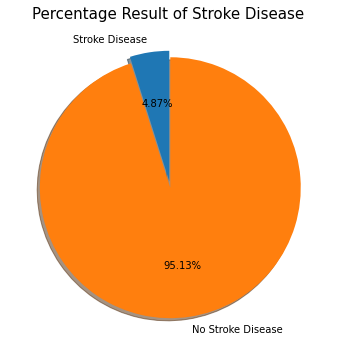

In [9]:
# Print Pie Chart
plt.figure(figsize=(6,6))
stroke_disease = len(data[data['stroke'] == 1])
no_stroke_disease = len(data[data['stroke'] == 0])
plt.title("Percentage Result of Stroke Disease ",fontsize = 15)
plt.pie(x=[stroke_disease, no_stroke_disease], explode=[0.05, 0], labels=['Stroke Disease', 'No Stroke Disease'], autopct='%1.2f%%', shadow=True,startangle = 90)
plt.show()



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


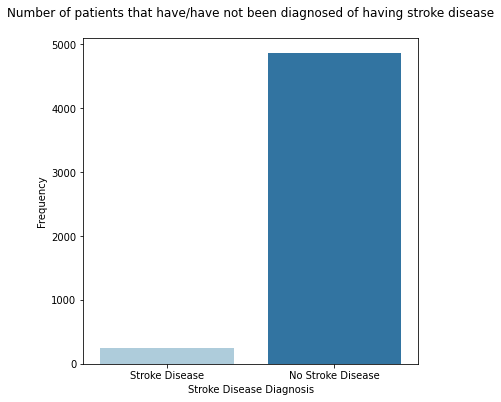

No Stroke Disease    4861
Stroke Disease        249
Name: stroke, dtype: int64


In [10]:
# change value from int to string 
data['stroke'] = data['stroke'].replace(1, 'Stroke Disease')
data['stroke'] = data['stroke'].replace(0, 'No Stroke Disease')

plt.figure(figsize=(6,6))
sns.countplot(data.stroke,palette='Paired')

plt.title("Number of patients that have/have not been diagnosed of having stroke disease\n")
plt.ylabel("Frequency")
plt.xlabel("Stroke Disease Diagnosis")
plt.show()

stroke = data.stroke.value_counts()
print(stroke)

Based on the chart above, we know that of 5110 patients, 249 of them have stroke disease while the rest of the patients (4861) do not have stroke disease. In terms of percentage, 95.13% of the patients have been diagnosed of having heart disease while 4.87% of them have not


### Gender


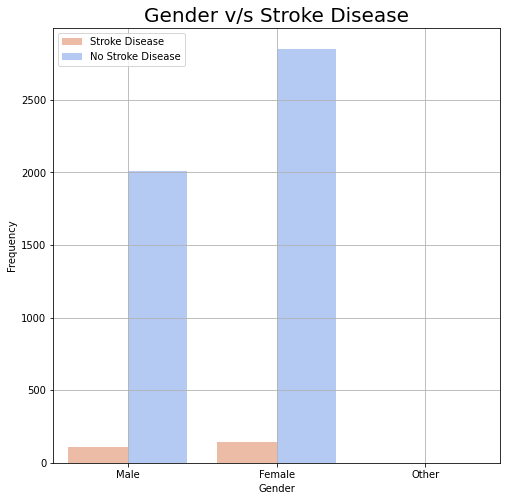

In [11]:
 # relation between sex and target 
plt.figure(figsize=(8,8))
sns.countplot(data = data, x ='gender', hue = 'stroke', palette = 'coolwarm_r')
plt.legend(['Stroke Disease', 'No Stroke Disease'])
plt.title('Gender v/s Stroke Disease',fontsize = 20)
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.grid()
plt.show()

In [12]:
gender = data.gender.value_counts()
print(gender)

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64


From the figures above, approximately 108 male patients and 142 female patients have been diagnosed of having stroke disease. On the other hand, 2008 male patients and 2852 female patients have not been diagnosed with stroke disease.



In [13]:
stroke_disease = data.loc[data["stroke"] == 'Stroke Disease']
no_stroke_disease = data.loc[data["stroke"] == 'No Stroke Disease']

### Age

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


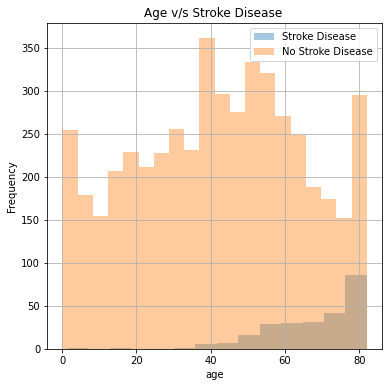

In [14]:
plt.figure(figsize=(6,6))
sns.distplot(stroke_disease["age"],kde = False)
sns.distplot(no_stroke_disease["age"],kde = False)
plt.legend(['Stroke Disease', 'No Stroke Disease'])
plt.title('Age v/s Stroke Disease ')
plt.ylabel('Frequency')
plt.grid()
plt.show()

The sample data is taken from the patients whose ages ranging from 1 to 82 years old. From the figure above, it shows that the total number of patients who do not have stroke disease is larger than the number of patients who have stroke disease. Most of the patients who have been diagnosed of having stroke disease are aged from 36 year old to 82 years old. 

### Hypertension

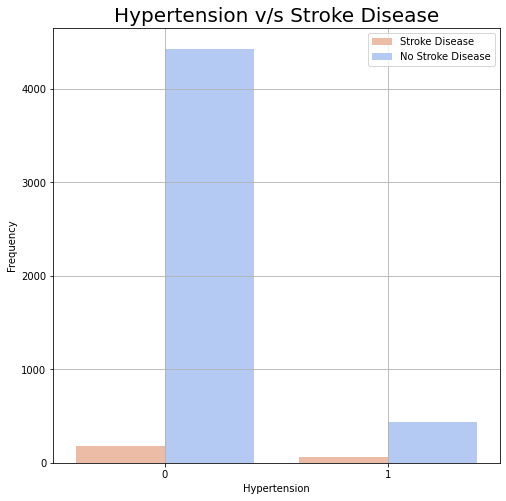

In [15]:
 # relation between sex and target 
plt.figure(figsize=(8,8))
sns.countplot(data = data, x ='hypertension', hue = 'stroke', palette = 'coolwarm_r')
plt.legend(['Stroke Disease', 'No Stroke Disease'])
plt.title('Hypertension v/s Stroke Disease',fontsize = 20)
plt.xlabel('Hypertension')
plt.ylabel('Frequency')
plt.grid()
plt.show()

In [16]:
Hypertension = data.hypertension.value_counts()
print(Hypertension)

0    4612
1     498
Name: hypertension, dtype: int64


From the diagram above, we can observe that, there are 498 patients having hypertension disease while 4612 do not. Of all the patients that have hypertension, 66 of them are having stroke disease at the same time. On the other hand, for the patients that do not have hypertension, 183 of them have been diagnosed by having stroke disease while 4429 of them are considered healthy and do not have stroke disease.


### Heart Disease

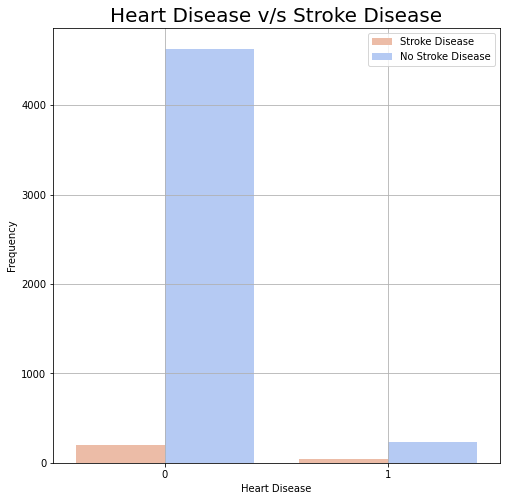

In [17]:
 # relation between sex and target 
plt.figure(figsize=(8,8))
sns.countplot(data = data, x ='heart_disease', hue = 'stroke', palette = 'coolwarm_r')
plt.legend(['Stroke Disease', 'No Stroke Disease'])
plt.title('Heart Disease v/s Stroke Disease',fontsize = 20)
plt.xlabel('Heart Disease')
plt.ylabel('Frequency')
plt.grid()
plt.show()

In [18]:
heart_disease = data.heart_disease.value_counts()
print(heart_disease)

0    4834
1     276
Name: heart_disease, dtype: int64


According to the bar chart above, approximately 4834 patients do not have heart disease while 276 have. Of all the patients that do not have heart disease, 202 of them are suffering from stroke disease. On the other hand, 47 patients are having both heart disease and stroke disease at the same time.



### Work Type

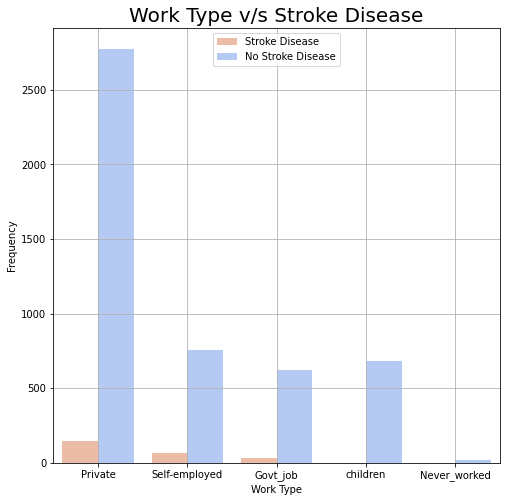

In [19]:
 # relation between sex and target 
plt.figure(figsize=(8,8))
sns.countplot(data = data, x ='work_type', hue = 'stroke', palette = 'coolwarm_r')
plt.legend(['Stroke Disease', 'No Stroke Disease'])
plt.title('Work Type v/s Stroke Disease',fontsize = 20)
plt.xlabel('Work Type')
plt.ylabel('Frequency')
plt.grid()
plt.show()

In [20]:
work_type = data.work_type.value_counts()
print(work_type)

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64


From the bar chart above, we can see that, of 2925 patients whose work type is private, 2776 of them do not have stroke disease while the rest of them (149)  have stroke disease. 

Besides, 65 patients who are self-employed have been diagnosed of having stroke disease while 754 of them have not. Furthermore, there are a total of 687 patients who are categorised as the children work type. Among 687 of them, only 2 have stroke disease while the remaining do not have stroke disease. 

Furthermore, for patients who works as government officers, 624 of them do not suffer from heart disease while 33 of them do have stroke disease 

Lastly, all the patients who are jobless have been diagnosed of having stroke disease

### Average Glucose Level

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


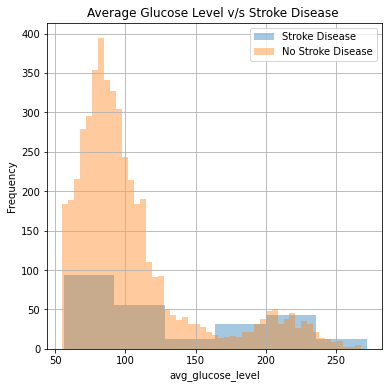

In [21]:
plt.figure(figsize=(6,6))
sns.distplot(stroke_disease["avg_glucose_level"],kde = False)
sns.distplot(no_stroke_disease["avg_glucose_level"],kde = False)
plt.legend(['Stroke Disease', 'No Stroke Disease'])
plt.title('Average Glucose Level v/s Stroke Disease ')
plt.ylabel('Frequency')
plt.grid()
plt.show()

From the figure above, the number of patients getting stroke disease is at the peak when the average blood glucose level is approximately between 56mg/dL and 90mg/dL. The number then decreases slightly and maintains at a constant level between 90mg/dL and 130mg/dL. It then continues to fluctuate while the average glucose level increases. 


### BMI Value

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


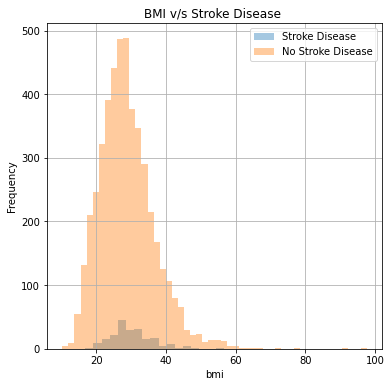

In [22]:
plt.figure(figsize=(6,6))
sns.distplot(stroke_disease["bmi"],kde = False)
sns.distplot(no_stroke_disease["bmi"],kde = False)
plt.legend(['Stroke Disease', 'No Stroke Disease'])
plt.title('BMI v/s Stroke Disease ')
plt.ylabel('Frequency')
plt.grid()
plt.show()

From the figure above, it is shown that the graph is normally distributed for both the patients who have or do not have stroke disease. For patients who have stroke disease, the number increases when the bmi increases from 18 to 30. It then decreases gradually afterwards.

### Smoking Status

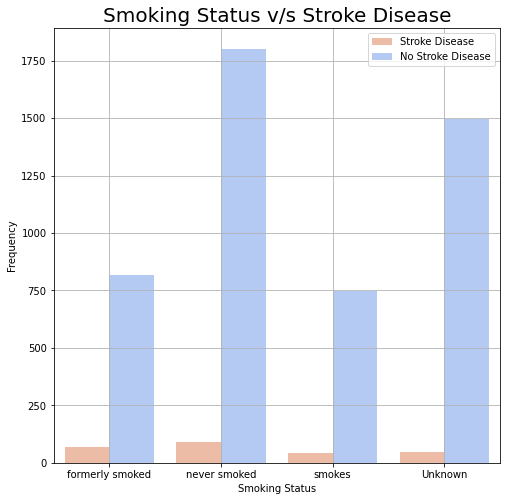

In [23]:
 # relation between sex and target 
plt.figure(figsize=(8,8))
sns.countplot(data = data, x ='smoking_status', hue = 'stroke', palette = 'coolwarm_r')
plt.legend(['Stroke Disease', 'No Stroke Disease'])
plt.title('Smoking Status v/s Stroke Disease',fontsize = 20)
plt.xlabel('Smoking Status')
plt.ylabel('Frequency')
plt.grid()
plt.show()

In [24]:
smoking_status = data.smoking_status.value_counts()
print(smoking_status)

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64


Based on the bar chart above, we can observe that 70 patients who smoked formerly have stroke disease while 815 do not.

Besides, among 1892 patients who have never smoked, 90 of them have been diagnosed of having stroke disease while 1802 do not. 

Next, there are 789 patients who are still smoking currently. Of all, 42 patients are suffering from stroke disease while the rest of the patients do not.


### Ever Married

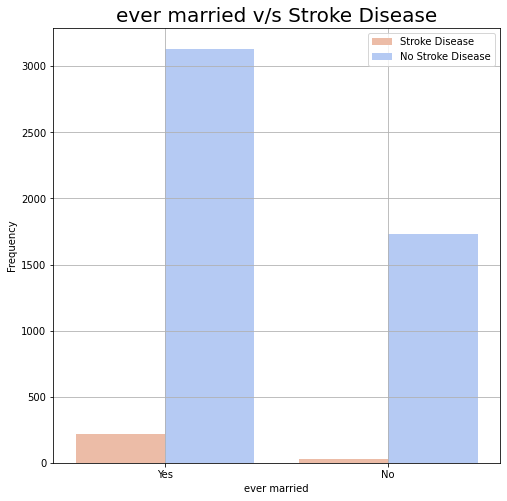

In [25]:
plt.figure(figsize=(8,8))
sns.countplot(data = data, x ='ever_married', hue = 'stroke', palette = 'coolwarm_r')
plt.legend(['Stroke Disease', 'No Stroke Disease'])
plt.title('ever married v/s Stroke Disease',fontsize = 20)
plt.xlabel('ever married')
plt.ylabel('Frequency')
plt.grid()
plt.show()

In [26]:
ever_married = data.ever_married.value_counts()
print(ever_married)

Yes    3353
No     1757
Name: ever_married, dtype: int64


Based on the diagram above, 3353 patients have ever gotten married while 1757 have not. Among the 3353 patients, 220 of them are suffering from stroke disease. On the other hand, among those patients who have not gotten married, 29 of them have stroke disease while 1728 of them do not have stroke disease.  

### Residence type

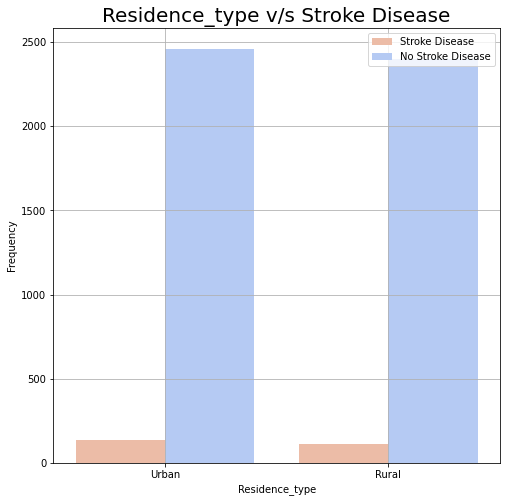

In [27]:
plt.figure(figsize=(8,8))
sns.countplot(data = data, x ='Residence_type', hue = 'stroke', palette = 'coolwarm_r')
plt.legend(['Stroke Disease', 'No Stroke Disease'])
plt.title('Residence_type v/s Stroke Disease',fontsize = 20)
plt.xlabel('Residence_type')
plt.ylabel('Frequency')
plt.grid()
plt.show()

In [28]:
Residence_type = data.Residence_type.value_counts()
print(Residence_type)

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64


Based on the diagram above, 2596 patients live in urban areas while 2514 live in rural areas. Among those who live in urban areas, 135 of them are suffering from stroke disease while the remaining 2461 patients do not. On the other hand, among those who live in rural areas, 114 of them have stroke disease while 2400 of them do not have stroke disease.  


## 2.2 Post-EDA

After understanding the data, we notice that the dataset is imbalanced and have decided to handle it by using a resample method. We have also plotted a pairplot and correlation graph to better visualise the data. Lastly, we have removed one unwanted column which is the ID column as it does not carry any meaning during data modeling.


### Handle imbalance data

In [29]:
from sklearn.utils import resample

In [30]:
data.reset_index(drop=True, inplace=True)

In [31]:
data['stroke'] = data['stroke'].replace('Stroke Disease', 1)
data['stroke'] = data['stroke'].replace('No Stroke Disease',0)

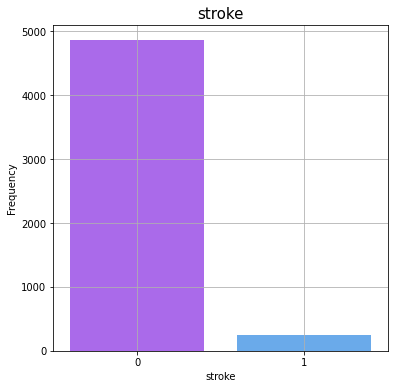

In [32]:
# Bar chart
import matplotlib.pyplot as plt
import seaborn as sns

# Print Bar Chart
plt.figure(figsize=(6,6))
loanStatus = sns.countplot(data = data, x = 'stroke', palette = 'cool_r')
plt.title('stroke',fontsize = 15)
plt.ylabel("Frequency")
plt.xlabel("stroke")

plt.grid(True)
plt.show()

In [33]:
stroke = data.stroke.value_counts()
print(stroke)

0    4861
1     249
Name: stroke, dtype: int64


In [34]:
data_majority = data[data['stroke'] ==  0]
data_minority = data[data['stroke'] ==  1]

In [35]:
data_minority_unsampled = resample(data_minority, replace = True, n_samples = 4861, random_state = 42)

In [36]:
data = pd.concat([data_majority,data_minority_unsampled])

data.stroke.value_counts()

1    4861
0    4861
Name: stroke, dtype: int64

1    4861
0    4861
Name: stroke, dtype: int64



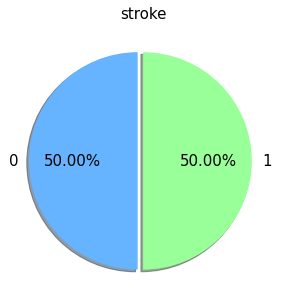

In [37]:
# Print Pie Chart

plt.figure(figsize=(5,5))

colors = ['#66b3ff', '#99ff99']
data.groupby('stroke').size().plot(kind ='pie', autopct ='%.2f%%', shadow = True, startangle = 90, colors = colors, explode = (0.05,0), fontsize = 15)

plt.title('stroke',fontsize = 15)
plt.xlabel('')
plt.ylabel('')

target = data['stroke'].value_counts()
print(target)
print()

### Pairplot


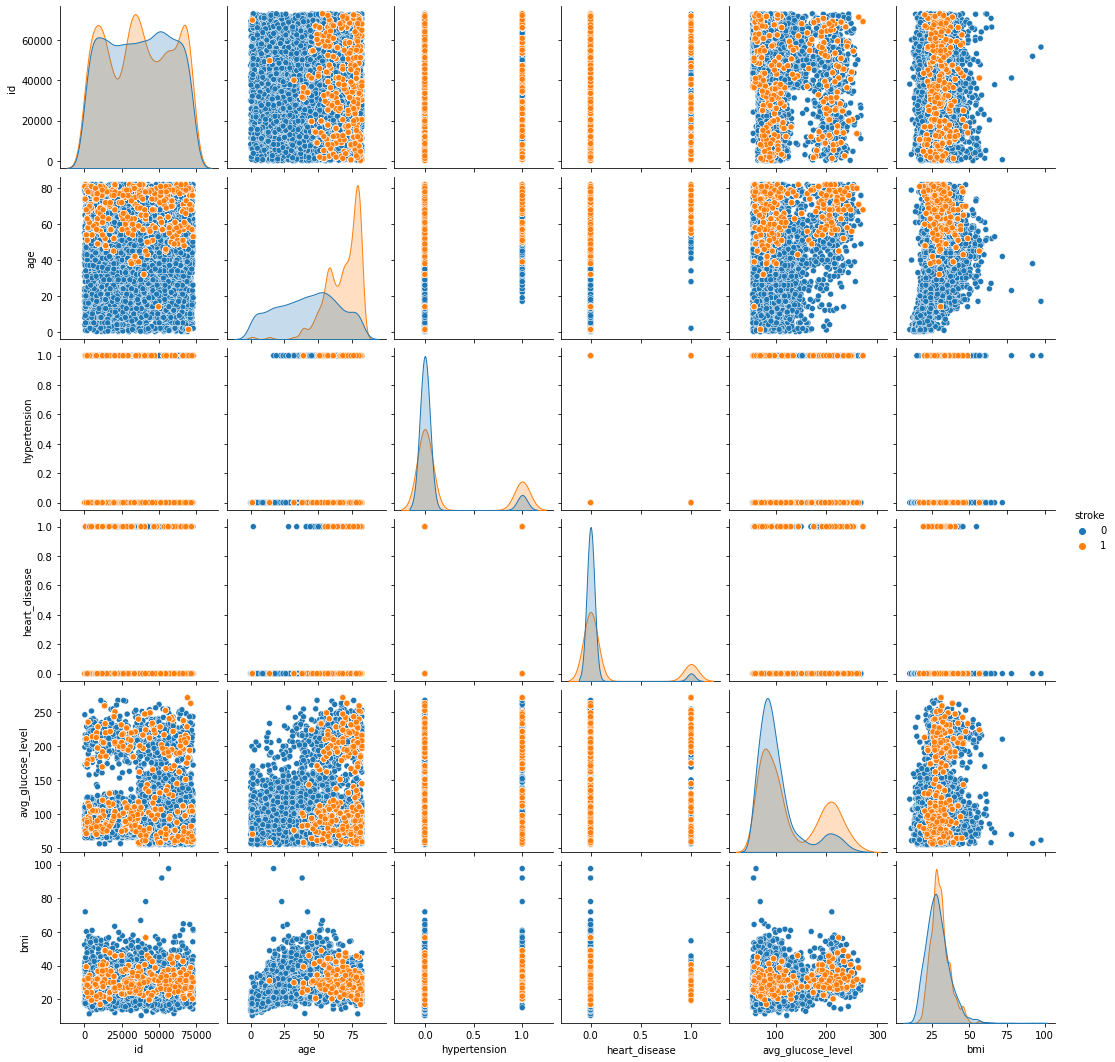

In [38]:
sns.pairplot(data, hue='stroke')

### Check uniquie value to determine whether there are any duplicate  records 

#### Remove unused column 


In [39]:
# drop unused features 

data.drop(labels=['id'], axis=1, inplace=True) 
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
249,Male,3.0,0,0,No,children,Rural,95.12,18.0,Unknown,0
250,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
251,Female,8.0,0,0,No,Private,Urban,110.89,17.6,Unknown,0
252,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
253,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,Unknown,0
...,...,...,...,...,...,...,...,...,...,...,...
178,Female,80.0,0,0,Yes,Govt_job,Urban,110.66,NaN,Unknown,1
174,Female,78.0,0,0,Yes,Self-employed,Rural,60.67,NaN,formerly smoked,1
238,Female,51.0,1,0,Yes,Private,Urban,88.20,28.4,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1


#### Check correlation first 
in order to know how to handle remaining misssing value 

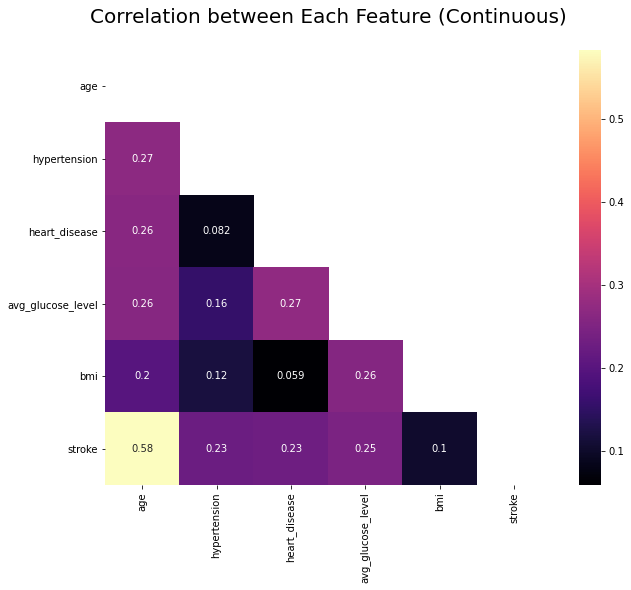

In [40]:
def corr_heat(df):   

    correlation = df.corr()
    plt.figure(figsize=(10,8)) 

    mask = np.triu(correlation)
    sns.heatmap(correlation, annot = True, mask = mask, cmap='magma')

    plt.title('Correlation between Each Feature (Continuous)\n', fontsize = 20)
    plt.show()
 
# Heat Map
corr_heat(data)

##### Check the relationship between Backrupticies with Number of Credit Problems, Tax Liens

In [41]:
data.loc[data['bmi'].isna()][['age','stroke','bmi']]

,age,stroke,bmi
342,34.0,0,NaN
360,76.0,0,NaN
432,63.0,0,NaN
477,61.0,0,NaN
479,54.0,0,NaN
...,...,...,...
178,80.0,1,NaN
218,76.0,1,NaN
81,66.0,1,NaN
178,80.0,1,NaN


In [42]:
print ("Unique values :  \n")
data.nunique()

Unique values :  



gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

In [43]:
data.shape

(9722, 11)

## 2.3 Train-test Split

### Column Splitting

In [44]:
from sklearn.model_selection import train_test_split

# Split the data to X and y
X = data.drop('stroke', axis = 1)
y = data['stroke']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [45]:
train_data = pd.concat([X_train, y_train], axis = 1)
test_data = pd.concat([X_test, y_test], axis = 1)


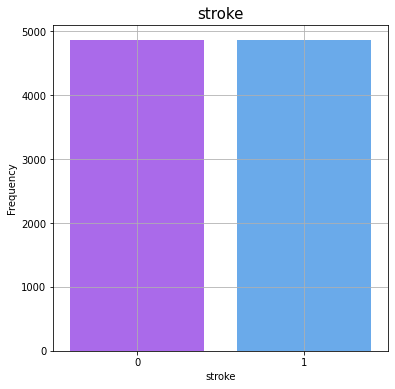

In [46]:
# Bar chart
import matplotlib.pyplot as plt
import seaborn as sns

# Print Bar Chart
plt.figure(figsize=(6,6))
loanStatus = sns.countplot(data = data, x = 'stroke', palette = 'cool_r')
plt.title('stroke',fontsize = 15)
plt.ylabel("Frequency")
plt.xlabel("stroke")

plt.grid(True)
plt.show()

# Chapter 3 Data cleaning

During the data pre-processing stage, the first thing that we have done is to split the dataset into training set and testing set. Then, we start to clean or pre-process these 2 sets of data. Firstly, we have identified several missing values and have decided to handle it by interpolation method. Besides, we have also handled some invalid values, especially gender and age. Furthermore, we have also removed some outliers in the dataset as these outliers can severely affect the outcome of data modeling. Next, since the computer does not understand string, therefore we have applied two types of encoding methods which are one-hot encoding and label encoding to make sure that the data is converted to binary digits. Lastly, we perform feature scaling steps to normalise the range of the continuous data. The feature scaling method used is standard scaler as our dataset shows a normally distributed graph.


## 3.1 Check Missing Value

In [47]:
# write a method for missing value because it may used for multiple time to print out the missing value

def missing_value(df):

  # total number of missing values
  t_cells = np.product(df.shape)
  t_missing = data.isnull().sum().sum() # total missing value for all 
    
  # percentage of missing values
  percent_missing = (t_missing/t_cells) * 100
  print("Percentage of missing value : {:.2f}%".format(percent_missing),"\n")
  
  misValue = data.isnull().sum()
  misPercentage = (df.isnull().sum() / len(df)) * 100 
  
  # Sorting (desc)
  misValue = misValue.sort_values(ascending=False)
  misPercentage = misPercentage.sort_values(ascending=False).round(2)
  
  # Make a table with the results
  
  misTable = pd.concat([misValue, misPercentage], axis=1)
    
  # Rename the columns name to specific name 
  misTable = misTable.rename(columns = {0 : 'Missing Values', 1 : 'Percentage(%)'})
    
  misTable = misTable[misTable.iloc[:,1] != 0]
  
  # print out a result in table form 
  return misTable

In [48]:
# Training Set
missing_value(train_data)

Percentage of missing value : 1.14% 



,Missing Values,Percentage(%)
bmi,972,9.85


In [49]:
# Test Set
missing_value(test_data)

Percentage of missing value : 4.54% 



,Missing Values,Percentage(%)
bmi,972,10.59


### Handle missing value by interpolate
BMI

In [50]:
# Example of ways to handle missing value 
# data['bmi'].fillna(data['bmi'].mean(), inplace = True)
# data['bmi'].fillna(data['bmi'].median(), inplace = True)
# data['bmi'].fillna(data['bmi'].interpolate(), inplace = True)

train_data.interpolate(inplace=True)
missing_value(train_data)

Percentage of missing value : 1.14% 



,Missing Values,Percentage(%)


In [51]:
test_data.interpolate(inplace=True)
missing_value(test_data)

Percentage of missing value : 4.54% 



,Missing Values,Percentage(%)
bmi,972,0.05


## 3.2 Handle invalid value using EDA 

### Gender 

In [52]:
train_data['gender'].describe()

count       7777
unique         3
top       Female
freq        4516
Name: gender, dtype: object

In [53]:
train_data.groupby('gender').size()

gender
Female    4516
Male      3260
Other        1
dtype: int64

In [54]:
test_data['gender'].describe()

count       1945
unique         2
top       Female
freq        1112
Name: gender, dtype: object

In [55]:
test_data.groupby('gender').size()

gender
Female    1112
Male       833
dtype: int64

Since the gender only can be classify into 2 which is male and female, and this dataset having 3 different group for gender therefore we need to check and remove the entire record with that value. 


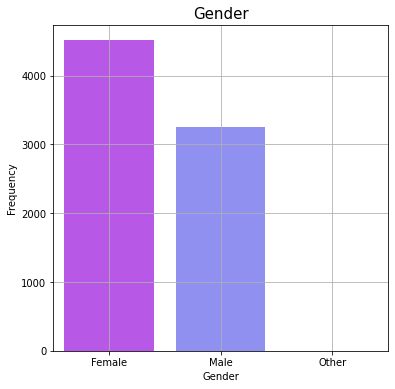

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

# Print Bar Chart
plt.figure(figsize=(6,6))
loanStatus = sns.countplot(data = train_data, x = 'gender', palette = 'cool_r')
plt.title('Gender',fontsize = 15)
plt.ylabel("Frequency")
plt.xlabel("Gender")

plt.grid(True)
plt.show()

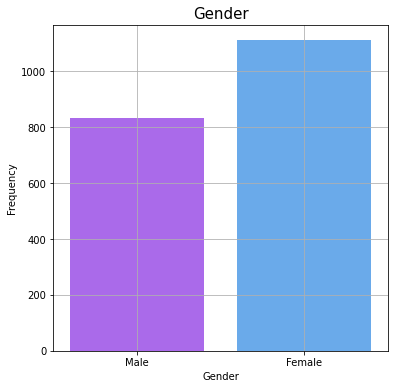

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

# Print Bar Chart
plt.figure(figsize=(6,6))
loanStatus = sns.countplot(data = test_data, x = 'gender', palette = 'cool_r')
plt.title('Gender',fontsize = 15)
plt.ylabel("Frequency")
plt.xlabel("Gender")

plt.grid(True)
plt.show()

since only one row of record having other gender therefore we will remove this as a outlier


In [58]:
train_data.drop(train_data[train_data.gender == 'Other'].index, inplace=True)

In [59]:
test_data.drop(test_data[test_data.gender == 'Other'].index, inplace=True)

In [60]:
print("After remove the other(1 row):\n")
train_data.groupby('gender').size()

After remove the other(1 row):



gender
Female    4516
Male      3260
dtype: int64

In [61]:
print("After remove the other(1 row):\n")
test_data.groupby('gender').size()

After remove the other(1 row):



gender
Female    1112
Male       833
dtype: int64

### Age

In [62]:
train_data.age.describe()

count    7776.000000
mean       54.913297
std        22.117861
min         0.080000
25%        41.000000
50%        59.000000
75%        74.000000
max        82.000000
Name: age, dtype: float64

In [63]:
test_data.age.describe()

count    1945.000000
mean       54.945131
std        22.716994
min         0.160000
25%        40.000000
50%        60.000000
75%        74.000000
max        82.000000
Name: age, dtype: float64

In [64]:
train_data['age']= np.ceil(train_data.age).astype(int)


In [65]:
test_data['age']= np.ceil(test_data.age).astype(int)

## 3.3 Handle outlier 

Text(0.5, 1.0, 'Outlier(overall) detected by Boxplot')

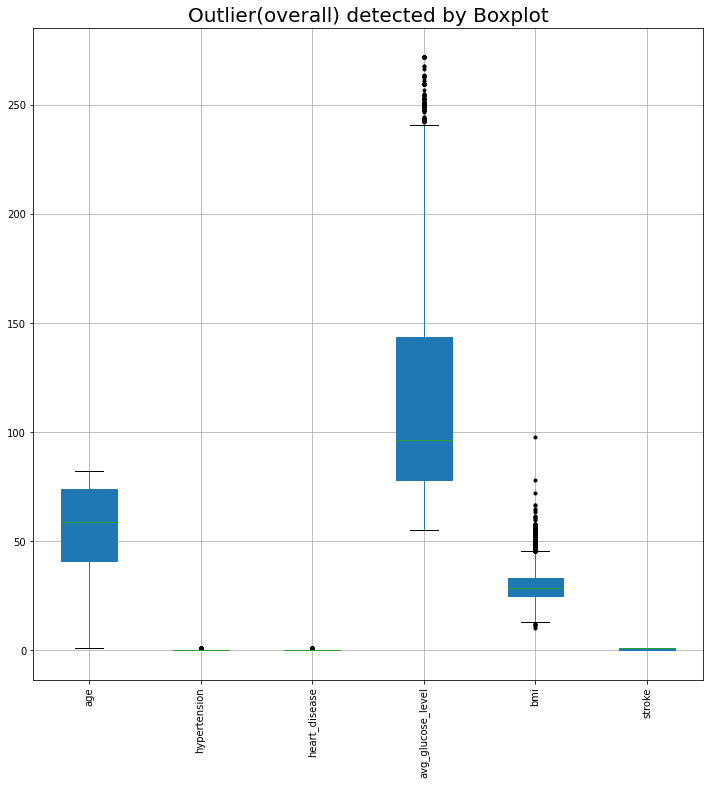

In [66]:
# Detect overall outliers (Training set)
import matplotlib.pyplot as plt

plt.figure(figsize=(12,12))
train_data.boxplot(patch_artist=True, sym="k.")
plt.xticks(rotation=90)
plt.title("Outlier(overall) detected by Boxplot",fontsize = 20)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0.5, 1.0, 'Outlier(overall) detected by Boxplot')

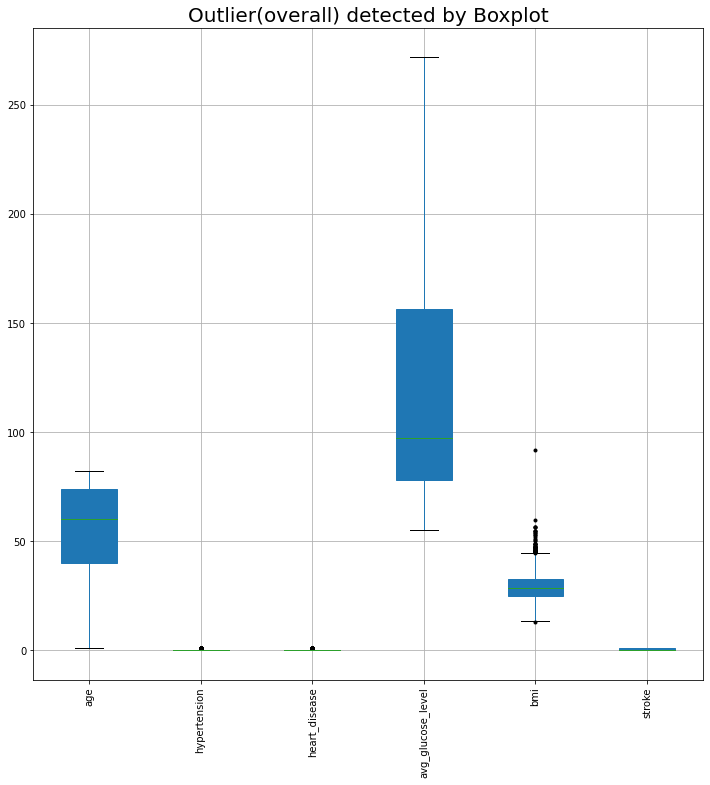

In [67]:
# Detect overall outliers (Testing set)
import matplotlib.pyplot as plt

plt.figure(figsize=(12,12))
test_data.boxplot(patch_artist=True, sym="k.")
plt.xticks(rotation=90)
plt.title("Outlier(overall) detected by Boxplot",fontsize = 20)

### Age

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(<matplotlib.axes._subplots.AxesSubplot at 0x7f57bc170b50>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f57bc170b50>)

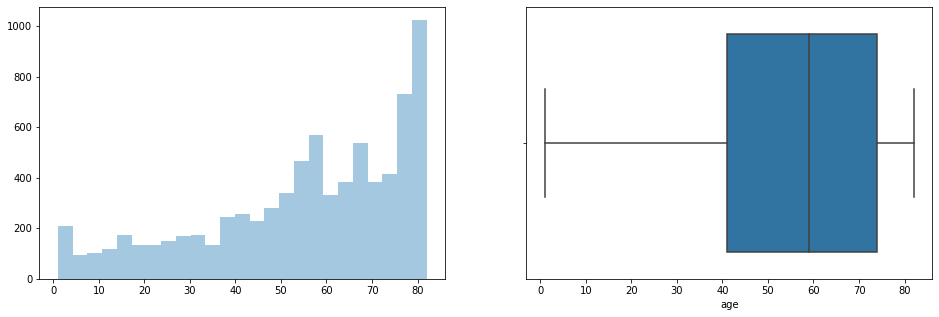

In [68]:
plt.figure(figsize= (16,5))
plt.subplot(121), sns.distplot(x = train_data['age'], kde = False)
plt.subplot(122), sns.boxplot(x = train_data['age'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(<matplotlib.axes._subplots.AxesSubplot at 0x7f57bbf785d0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f57bbf785d0>)

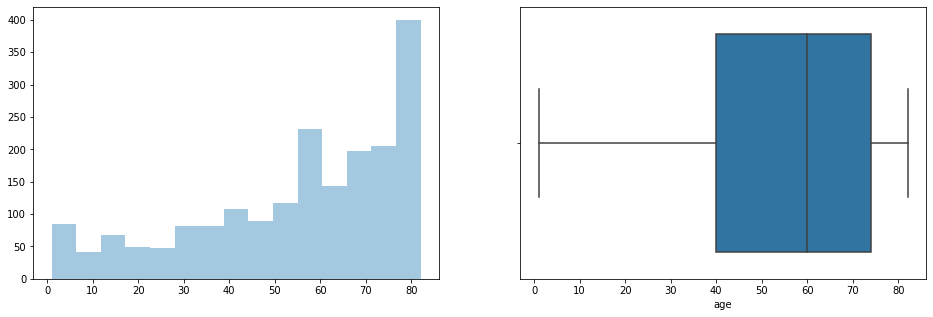

In [69]:
plt.figure(figsize= (16,5))
plt.subplot(121), sns.distplot(x = test_data['age'], kde = False)
plt.subplot(122), sns.boxplot(x = test_data['age'])

### Average glucose level


In [70]:
train_data.shape

(7776, 11)

In [71]:
test_data.shape

(1945, 11)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(<matplotlib.axes._subplots.AxesSubplot at 0x7f57bbd9a7d0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f57bbd9a7d0>)

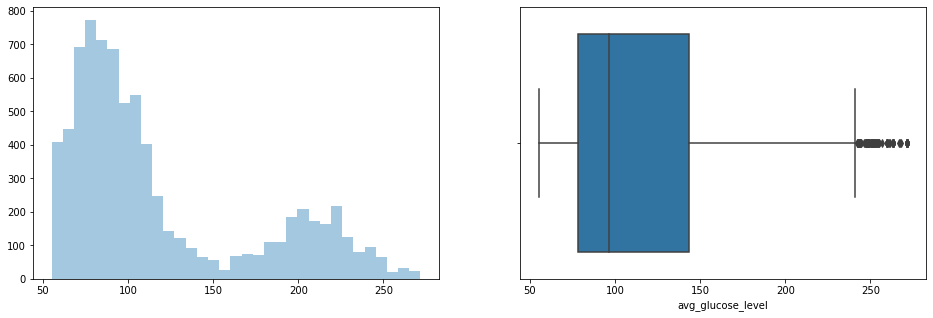

In [72]:
# Average glucose level
# training data 
plt.figure(figsize= (16,5))

plt.subplot(121), sns.distplot(x = train_data['avg_glucose_level'], kde = False)
plt.subplot(122), sns.boxplot(x = train_data['avg_glucose_level'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(<matplotlib.axes._subplots.AxesSubplot at 0x7f57bbcf8390>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f57bbcf8390>)

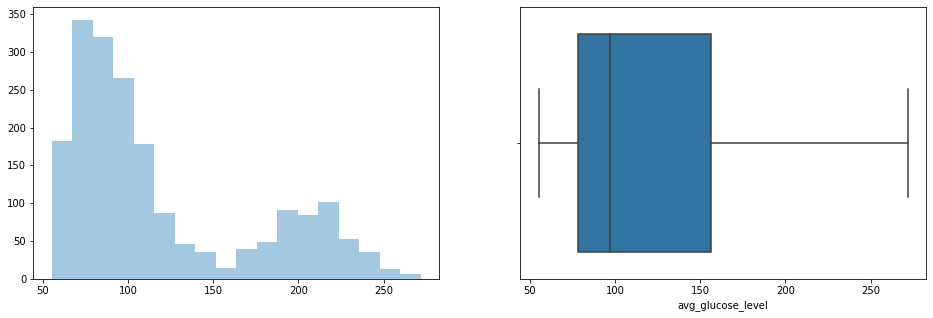

In [73]:
# Average glucose level
# testing data 
plt.figure(figsize= (16,5))

plt.subplot(121), sns.distplot(x = test_data['avg_glucose_level'], kde = False)
plt.subplot(122), sns.boxplot(x = test_data['avg_glucose_level'])

### BMI

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(<matplotlib.axes._subplots.AxesSubplot at 0x7f57bc159ed0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f57bc159ed0>)

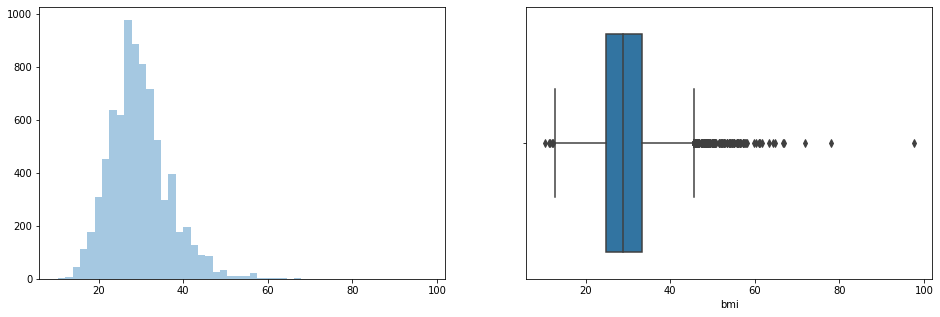

In [74]:
# BMI 
# training data 
plt.figure(figsize= (16,5))

plt.subplot(121), sns.distplot(x = train_data['bmi'], kde = False)
plt.subplot(122), sns.boxplot(x = train_data['bmi'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(<matplotlib.axes._subplots.AxesSubplot at 0x7f57bbc26090>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f57bbc26090>)

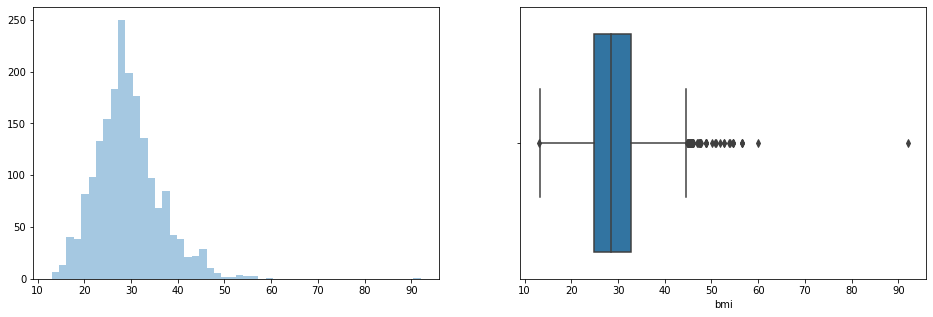

In [75]:
# BMI 
# testing data 
plt.figure(figsize= (16,5))

plt.subplot(121), sns.distplot(x = test_data['bmi'], kde = False)
plt.subplot(122), sns.boxplot(x = test_data['bmi'])

In [76]:
# Finding the all outliers 
import math  

def outliers(data):
    outliers = []

    Q1, Q3 = data.quantile([0.25, 0.75])

    IQR = Q3 - Q1

    upper_range = Q3 + IQR*(1.5)
    # lower_range = (Q1 - IQR*(1.5)) 
    lower_range = (Q1 - IQR*(1.5)) ** 2 
    lower_range = math.sqrt(lower_range)
    
    for x in data:
        if x > upper_range or x < lower_range:
            outliers.append(x)
                
            
    return outliers, upper_range, lower_range

In [77]:
# Outliers for the column avg_glucose_level
outliers_agl_train, max_agl_train, min_agl_train = outliers(train_data['avg_glucose_level'])
print("Maximum value of avg_glucose_level_train : ", round(max_agl_train,4))
print("Minimun value of avg_glucose_level_train : ", round(min_agl_train,4))

Maximum value of avg_glucose_level_train :  241.4663
Minimun value of avg_glucose_level_train :  19.9637


In [78]:
# # Outliers for the column avg_glucose_level
outliers_agl_test, max_agl_test, min_agl_test = outliers(test_data['avg_glucose_level'])
print("Maximum value of avg_glucose_level_test : ", round(max_agl_test,4))
print("Minimum value of avg_glucose_level_test : ", round(min_agl_test,4))

Maximum value of avg_glucose_level_test :  273.805
Minimum value of avg_glucose_level_test :  39.195


In [79]:
# Outliers for the column bmi
outliers_bmi_train, max_bmi_train, min_bmi_train = outliers(train_data['bmi'])
print("Maximum value of bmi : ", round(max_bmi_train,4))
print("Minimum value of bmi : ", round(min_bmi_train,4))

Maximum value of bmi :  45.6813
Minimum value of bmi :  12.4312


In [80]:
# Outliers for the column bmi
outliers_bmi_test, max_bmi_test, min_bmi_test = outliers(test_data['bmi'])
print("Maximum value of bmi : ", round(max_bmi_test,4))
print("Minimum value of bmi : ", round(min_bmi_test,4))

Maximum value of bmi :  44.6594
Minimum value of bmi :  13.0344


In [81]:
# Total number of outliers in these two columns
print("Total number of outlier of avg_glucose_level : ", len(outliers_agl_train))
print("Total number of outlier of bmi : ", len(outliers_bmi_train))

Total number of outlier of avg_glucose_level :  181
Total number of outlier of bmi :  206


In [82]:
# Total number of outliers in these two columns
print("Total number of outlier of avg_glucose_level : ", len(outliers_agl_test))
print("Total number of outlier of bmi : ", len(outliers_bmi_test))

Total number of outlier of avg_glucose_level :  0
Total number of outlier of bmi :  61


In [83]:
#avg_glucose_level
train_data = train_data[(train_data['avg_glucose_level'] >= min_agl_train) & (train_data['avg_glucose_level'] <= max_agl_train)]
# train_data = train_data[(train_data['avg_glucose_level'] <= max_agl_train)]

# BMI
train_data = train_data[(train_data['bmi'] >= min_bmi_train) & (train_data['bmi'] <= max_bmi_train)]

In [84]:

#avg_glucose_level
# test_data = test_data[(test_data['avg_glucose_level'] >= min_agl_test) & (test_data['avg_glucose_level'] <= max_agl_test)]
# test_data = test_data[(test_data['avg_glucose_level'] <= max_agl_test)]

# BMI
test_data = test_data[(test_data['bmi'] >= min_bmi_test) & (test_data['bmi'] <= max_bmi_test)]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(<matplotlib.axes._subplots.AxesSubplot at 0x7f57bbad1c50>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f57bbad1c50>)

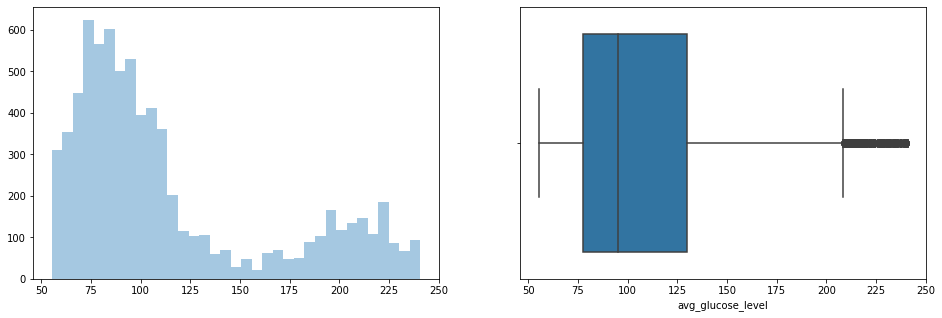

In [85]:
#avg_glucose_level
plt.figure(figsize= (16,5))
plt.subplot(121), sns.distplot(x = train_data['avg_glucose_level'], kde = False)
plt.subplot(122), sns.boxplot(x = train_data['avg_glucose_level'])

In [86]:
# #avg_glucose_level
# plt.figure(figsize= (16,5))
# plt.subplot(121), sns.distplot(x = test_data['avg_glucose_level'], kde = False)
# plt.subplot(122), sns.boxplot(x = test_data['avg_glucose_level'])

In [87]:
train_data.shape

(7390, 11)

In [88]:
test_data.shape

(1883, 11)

In [89]:
# # BMI

# data = data[(data['bmi'] >= min_bmi) & (data['bmi'] <= max_bmi)]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(<matplotlib.axes._subplots.AxesSubplot at 0x7f57bb95b390>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f57bb95b390>)

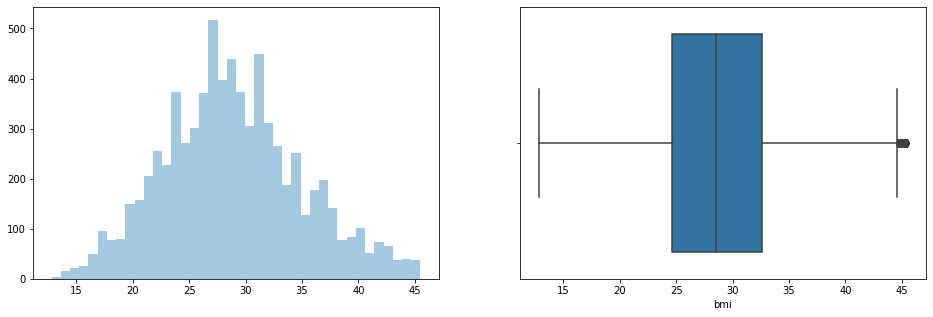

In [90]:
# BMI
plt.figure(figsize= (16,5))
plt.subplot(121), sns.distplot(x = train_data['bmi'], kde = False)
plt.subplot(122), sns.boxplot(x = train_data['bmi'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(<matplotlib.axes._subplots.AxesSubplot at 0x7f57bb943610>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f57bb943610>)

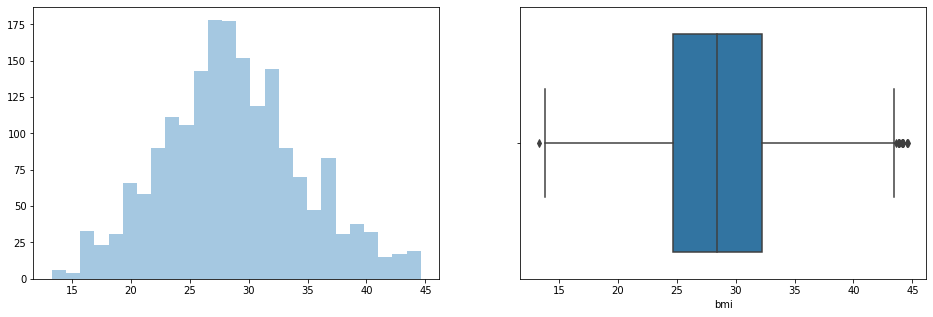

In [91]:
# BMI
plt.figure(figsize= (16,5))
plt.subplot(121), sns.distplot(x = test_data['bmi'], kde = False)
plt.subplot(122), sns.boxplot(x = test_data['bmi'])

In [92]:
train_data.shape

(7390, 11)

In [93]:
test_data.shape

(1883, 11)

## 3.4 Feature Engineering 

### One hot encoding 
(get_dummies) for multiple value of categorical data 

In [94]:
categorical_ohe_train = train_data[['work_type', 'Residence_type', 'smoking_status']]

# One hot encode
categorical_ohe_train = pd.get_dummies(categorical_ohe_train)

# Join the dataframe in data 

# drop the original categorical datas and after I will join the new one.
train_data.drop(labels=['work_type', 'Residence_type', 'smoking_status'], axis=1, inplace=True)
train_data = pd.concat([train_data, categorical_ohe_train], axis = 1)

In [95]:
categorical_ohe_test = test_data[['work_type', 'Residence_type', 'smoking_status']]

# One hot encode
categorical_ohe_test = pd.get_dummies(categorical_ohe_test)

# Join the dataframe in data 

# drop the original categorical datas and after I will join the new one.

test_data.drop(labels=['work_type', 'Residence_type', 'smoking_status'], axis=1, inplace=True)
test_data = pd.concat([test_data, categorical_ohe_test], axis = 1)

In [96]:
print ("Features : \n" , train_data.columns.tolist())
print ("Total Columns:", train_data.shape[1])

Features : 
 ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'avg_glucose_level', 'bmi', 'stroke', 'work_type_Govt_job', 'work_type_Never_worked', 'work_type_Private', 'work_type_Self-employed', 'work_type_children', 'Residence_type_Rural', 'Residence_type_Urban', 'smoking_status_Unknown', 'smoking_status_formerly smoked', 'smoking_status_never smoked', 'smoking_status_smokes']
Total Columns: 19


In [97]:
print ("Features : \n" , test_data.columns.tolist())
print ("Total Columns:", test_data.shape[1])

Features : 
 ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'avg_glucose_level', 'bmi', 'stroke', 'work_type_Govt_job', 'work_type_Never_worked', 'work_type_Private', 'work_type_Self-employed', 'work_type_children', 'Residence_type_Rural', 'Residence_type_Urban', 'smoking_status_Unknown', 'smoking_status_formerly smoked', 'smoking_status_never smoked', 'smoking_status_smokes']
Total Columns: 19


### Label encoding 

In [98]:
from sklearn.preprocessing import LabelEncoder

# creating initial dataframe
categorical_data_train = train_data[['gender', 'ever_married']]

# creating instance of labelencoder
le = LabelEncoder()

categorical_data_train = categorical_data_train.apply(le.fit_transform)

train_data.drop(labels = ['gender', 'ever_married'], axis=1, inplace=True)
train_data = pd.concat([train_data, categorical_data_train], axis = 1)
train_data.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,gender,ever_married
106,50,1,0,73.18,30.30,1,0,0,1,0,0,1,0,0,1,0,0,0,1
1,61,0,0,202.21,43.45,1,0,0,0,1,0,1,0,0,0,1,0,0,1
2010,78,0,0,95.37,17.30,0,0,0,1,0,0,1,0,1,0,0,0,0,1
2719,52,0,0,72.71,36.90,0,1,0,0,0,0,1,0,0,1,0,0,1,0
202,77,0,0,90.00,32.00,1,0,0,0,1,0,1,0,0,0,1,0,0,1


In [99]:
train_data.reset_index(drop=True, inplace=True)
train_data.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,gender,ever_married
0,50,1,0,73.18,30.30,1,0,0,1,0,0,1,0,0,1,0,0,0,1
1,61,0,0,202.21,43.45,1,0,0,0,1,0,1,0,0,0,1,0,0,1
2,78,0,0,95.37,17.30,0,0,0,1,0,0,1,0,1,0,0,0,0,1
3,52,0,0,72.71,36.90,0,1,0,0,0,0,1,0,0,1,0,0,1,0
4,77,0,0,90.00,32.00,1,0,0,0,1,0,1,0,0,0,1,0,0,1


In [100]:
from sklearn.preprocessing import LabelEncoder

# creating initial dataframe
categorical_data_test = test_data[['gender', 'ever_married']]

# creating instance of labelencoder
le = LabelEncoder()

categorical_data_test = categorical_data_test.apply(le.fit_transform)

test_data.drop(labels = ['gender', 'ever_married'], axis=1, inplace=True)
test_data = pd.concat([test_data, categorical_data_test], axis = 1)
test_data.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,gender,ever_married
20,71,0,0,193.94,22.4,1,1,0,0,0,0,1,0,0,0,0,1,0,1
35,82,1,1,84.03,26.5,1,0,0,1,0,0,1,0,0,1,0,0,0,0
89,74,0,0,98.55,25.6,1,0,0,1,0,0,0,1,1,0,0,0,1,1
224,49,0,0,104.86,31.9,1,0,0,1,0,0,1,0,0,0,0,1,1,0
230,81,0,0,81.95,16.9,1,0,0,0,1,0,1,0,0,0,1,0,0,1


In [101]:
test_data.reset_index(drop=True, inplace=True)
test_data.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,gender,ever_married
0,71,0,0,193.94,22.4,1,1,0,0,0,0,1,0,0,0,0,1,0,1
1,82,1,1,84.03,26.5,1,0,0,1,0,0,1,0,0,1,0,0,0,0
2,74,0,0,98.55,25.6,1,0,0,1,0,0,0,1,1,0,0,0,1,1
3,49,0,0,104.86,31.9,1,0,0,1,0,0,1,0,0,0,0,1,1,0
4,81,0,0,81.95,16.9,1,0,0,0,1,0,1,0,0,0,1,0,0,1


### le with cat.codes

In [102]:
# data['gender'] = data['gender'].astype('category')
# data['ever_married'] = data['ever_married'].astype('category')

In [103]:
# data['gender'] = data['gender'].cat.codes
# data['ever_married'] = data['ever_married'].cat.codes
# data.head()

1 - male, 0 - female

1 - yes, 0 - no


## Write data to csv file


In [104]:
train_data.to_csv('/content/drive/Shareddrives/BMCS2114 Machine Learning/Dataset/cleaned_stroke_data_train.csv')
test_data.to_csv('/content/drive/Shareddrives/BMCS2114 Machine Learning/Dataset/cleaned_stroke_data_test.csv')

In [105]:
train_data.shape

(7390, 19)

In [106]:
test_data.shape

(1883, 19)

## 3.5 Split Train and Test Data into X and y

In [107]:
X_train = train_data.drop('stroke', axis = 1)
y_train = train_data['stroke']

X_test = test_data.drop('stroke', axis = 1)
y_test = test_data['stroke']

In [108]:
X_train

,age,hypertension,heart_disease,avg_glucose_level,bmi,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,gender,ever_married
0,50,1,0,73.18,30.30,0,0,1,0,0,1,0,0,1,0,0,0,1
1,61,0,0,202.21,43.45,0,0,0,1,0,1,0,0,0,1,0,0,1
2,78,0,0,95.37,17.30,0,0,1,0,0,1,0,1,0,0,0,0,1
3,52,0,0,72.71,36.90,1,0,0,0,0,1,0,0,1,0,0,1,0
4,77,0,0,90.00,32.00,0,0,0,1,0,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7385,67,1,0,179.12,28.10,0,0,1,0,0,1,0,0,1,0,0,0,1
7386,57,0,1,217.08,26.85,1,0,0,0,0,0,1,1,0,0,0,1,0
7387,51,0,0,166.29,25.60,0,0,1,0,0,1,0,0,1,0,0,1,1
7388,29,0,0,105.73,28.20,0,0,1,0,0,1,0,0,0,0,1,1,0


In [109]:
print("counts of label '1': ", (sum(y_train==1)))
print("counts of label '0': ",(sum(y_train==0)))

counts of label '1':  3657
counts of label '0':  3733


In [110]:
X_train_continuous = X_train[['age', 'avg_glucose_level','bmi']]
X_test_continuous = X_test[['age', 'avg_glucose_level','bmi']]

X_train_categorical = X_train.drop(['age', 'avg_glucose_level','bmi'], axis = 1)
X_test_categorical = X_test.drop(['age', 'avg_glucose_level','bmi'], axis = 1)

In [111]:
X_train_continuous

,age,avg_glucose_level,bmi
0,50,73.18,30.30
1,61,202.21,43.45
2,78,95.37,17.30
3,52,72.71,36.90
4,77,90.00,32.00
...,...,...,...
7385,67,179.12,28.10
7386,57,217.08,26.85
7387,51,166.29,25.60
7388,29,105.73,28.20


In [112]:
X_train_categorical

,hypertension,heart_disease,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,gender,ever_married
0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1
1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1
2,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1
3,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0
4,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7385,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1
7386,0,1,1,0,0,0,0,0,1,1,0,0,0,1,0
7387,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1
7388,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0


## 3.6 Feature Scaling

In [113]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler


#Scale the data
scaler = StandardScaler(copy = False)
X_train_continuous = scaler.fit_transform(X_train_continuous)
X_test_continuous = scaler.transform(X_test_continuous)

In [114]:
X_train_continuous = pd.DataFrame(X_train_continuous)
X_train_continuous.columns =['age', 'avg_glucose_level', 'bmi']

In [115]:
X_test_continuous = pd.DataFrame(X_test_continuous)
X_test_continuous.columns = ['age', 'avg_glucose_level', 'bmi']

In [116]:
X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)

In [117]:
X_train[['age', 'avg_glucose_level', 'bmi']] = X_train_continuous
X_test[['age', 'avg_glucose_level', 'bmi']] = X_test_continuous

## 3.7 PCA
According to Brandon (2020), a common mistake where most new data scientists make is to apply PCA to non-continuous variable. It is because PCA is only suitable to be applied if the variable variables belong on a coordinate plane. Besides, Animesh (2014) also stated that it is recommended to use PCA when dealing with categorical data as it will form a few clusters that are disjointed and far from each other. Hence, we straight away proceed to data modeling

# Chapter 4 Data Modelling 

## 4.1 K-Nearest Neighbour (KNN)


KNN is a distance-based classifier and it can be used for both classification and regression predictive problems. KNN is an algorithm that can be used to classify an unseen similar object based on the bunch of objects that have been classified. In order to classify an object, k neighbourhoods need to be defined so that the object can be classified to the class most common among its k nearest neighbors. The k is a positive integer and typically small.  The value is the average of the values of k nearest neighbors and it is accurate. Therefore, by using KNN algorithm, Hospital ML is able to predict the stroke disease by classifying them by a plurality vote of its neighbors. Although KNN is simple, the classification accuracy of KNN is strong and it can generate the results which are accurate in many cases. 

In order to get the best parameter, Grid Search CV is used and the best parameter obtained is k value which equals to four with manhattan distance metric. Manhattan distance is usually preferred over the Euclidean distance when there is high dimensionality in the data. At the same time, a graph was plotted to check the k-value which has least mean squared error and highest accuracy in order to obtain the best k-value. The graph showed that the best k-value is 4 which has the least error with high accuracy. Therefore, k-value 4 was chosen as the parameter for KNN modelling and the result obtained has high accuracy and there is no overfitting. 

![image](https://user-images.githubusercontent.com/67597246/115142357-f199be00-a073-11eb-872b-8fbfa4bfbdfe.png)

In [119]:
#using grid search to find the hyperparameters for KNeighborsClassifier

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
metric = ['euclidean', 'manhattan', 'minkowski']
k_range = list(range(3,21))
param_grid = dict(n_neighbors=k_range,metric=metric)
knn_grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')

# fit the grid with data
knn_grid.fit(X_train, y_train)

# summarize results
print("Best: %f using %s" % (knn_grid.best_score_, knn_grid.best_params_))

Best: 0.938295 using {'metric': 'manhattan', 'n_neighbors': 4}


In [120]:
#K-Nearest Neighbour algorithm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

neighbors = list(range(3,21))

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k,metric='manhattan')
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

The optimal number of neighbors is 4


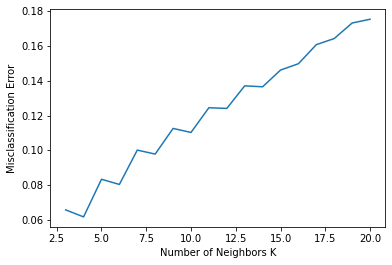

In [121]:
# changing to misclassification error
mse = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[mse.index(min(mse))]
print("The optimal number of neighbors is {}".format(optimal_k))

# plot misclassification error vs k
plt.plot(neighbors, mse)
plt.xlabel("Number of Neighbors K")
plt.ylabel("Misclassification Error")
plt.show()

The optimal number of neighbors is 4


Graph for Accuracy of k-value


Text(0, 0.5, 'Cross-Validated Accuracy')

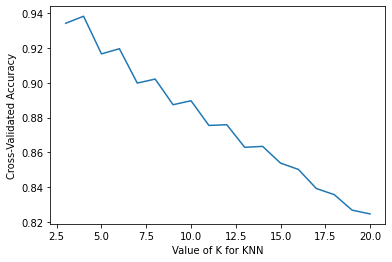

In [122]:
# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
# determining best k
acc = [x for x in cv_scores]
optimal_k = neighbors[acc.index(max(acc))]
print("The optimal number of neighbors is {}".format(optimal_k))

print("\n\nGraph for Accuracy of k-value")
plt.plot(range(3,21), cv_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [123]:
#take the best parameters from the result above
knn = KNeighborsClassifier(n_neighbors=4, metric= 'manhattan')
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


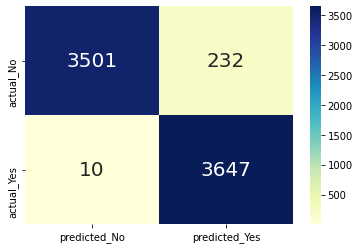

In [124]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import roc_auc_score,roc_curve,scorer
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score,recall_score

#trainset
pred_knn_train = knn.predict(X_train)

#display confusion matrix for trainset
KNN_cm_train=confusion_matrix(y_train,pred_knn_train)
sns.heatmap(KNN_cm_train,xticklabels=['predicted_No', 'predicted_Yes'], yticklabels=['actual_No','actual_Yes'],
           annot=True, fmt='d', annot_kws={'fontsize':20},cmap="YlGnBu");
true_neg, false_pos = KNN_cm_train[0]
true_pos, false_neg = KNN_cm_train[1]

            Trainset             Testset
Accuracy:   0.9672530446549391 	 0.9330855018587361
Recall:     0.9972655181843041 	 0.9755058572949947
Precision:  0.9401907708172209 	 0.8989205103042198
F1 score:   0.9678874734607219 	 0.9356486210418795


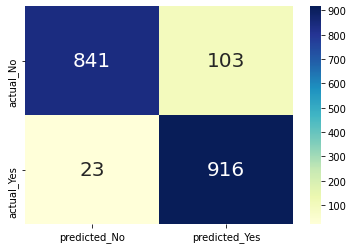

In [125]:
#use trainset to do prediction on testset
pred_knn = knn.predict(X_test)

#display confusion matrix for testset
KNN_cm=confusion_matrix(y_test,pred_knn)
sns.heatmap(KNN_cm,xticklabels=['predicted_No', 'predicted_Yes'], yticklabels=['actual_No','actual_Yes'],
           annot=True, fmt='d', annot_kws={'fontsize':20},cmap="YlGnBu");
true_neg, false_pos = KNN_cm[0]
true_pos, false_neg = KNN_cm[1]

#print the accuracy score, recall, precision and F1 score 
print("            Trainset             Testset")
print("Accuracy:  ",accuracy_score(y_train,pred_knn_train),"\t",accuracy_score(y_test,pred_knn))
print("Recall:    ",recall_score(y_train,pred_knn_train),"\t",recall_score(y_test,pred_knn))
print("Precision: ",precision_score(y_train,pred_knn_train),"\t",precision_score(y_test,pred_knn))
print("F1 score:  ",f1_score(y_train,pred_knn_train),"\t",f1_score(y_test,pred_knn))

In [126]:
# XY added
# testing set 
knn_acc = round((accuracy_score(y_test,pred_knn) * 100),2)
knn_pre = round((precision_score(y_test,pred_knn) * 100),2)
knn_rec = round((recall_score(y_test,pred_knn) * 100),2)
knn_f1 = round((f1_score(y_test,pred_knn) *100),2)


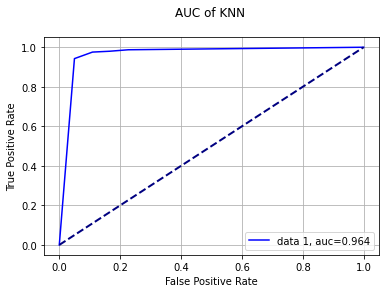

In [276]:
import sklearn.metrics as metrics

y_pred_proba =knn.predict_proba(X_test)[::,1]
fpr_knn, tpr_knn, _ = metrics.roc_curve(y_test,  y_pred_proba)
knn_roc_auc = round(metrics.roc_auc_score(y_test, y_pred_proba),4)
plt.plot(fpr_knn,tpr_knn,label="data 1, auc="+str(knn_roc_auc),color='blue')

lw = 2
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

plt.legend(loc=4)
plt.title("AUC of KNN \n")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.grid(True)
plt.show()

Feature ranking:
---------------------
1. age (0.163004)
2. avg_glucose_level (0.154452)
3. bmi (0.128579)
4. gender (0.079269)
5. hypertension (0.042355)
6. ever_married (0.026604)
7. heart_disease (0.023572)
8. smoking_status_never smoked (0.000595)
9. Residence_type_Urban (0.000433)
10. Residence_type_Rural (0.000433)
11. work_type_Private (0.000406)
12. work_type_Govt_job (0.000379)
13. smoking_status_formerly smoked (0.000217)
14. smoking_status_Unknown (0.000135)
15. work_type_Self-employed (0.000054)
16. work_type_Never_worked (0.000000)
17. smoking_status_smokes (-0.000081)
18. work_type_children (-0.000108)


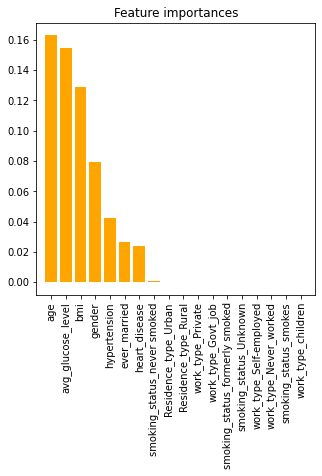

In [338]:
from sklearn.inspection import permutation_importance

# perform permutation importance
results = permutation_importance(knn, X_train, y_train, scoring='accuracy')
# get importance
importance = results.importances_mean

# plot feature importance
indices = np.argsort(importance)[::-1]
feature_names = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'work_type_Govt_job', 'work_type_Never_worked', 'work_type_Private', 'work_type_Self-employed', 'work_type_children', 'Residence_type_Rural', 'Residence_type_Urban', 'smoking_status_Unknown', 'smoking_status_formerly smoked', 'smoking_status_never smoked', 'smoking_status_smokes','gender', 'ever_married']

# Print the feature ranking
print("Feature ranking:")
print("---------------------")

for f in range(X_train.shape[1]):
    print("%d. " %(f + 1) + feature_names[indices[f]] + " (%f)" % importance[indices[f]])

plt.figure(figsize=(5,5))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importance[indices],color="orange",  align="center")
plt.xticks(range(X_train.shape[1]), [feature_names[i] for i in indices],rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [341]:
# Move all the continous feature data into a table
x_knn_import_train = X_train.drop(['Residence_type_Urban','Residence_type_Rural', 'smoking_status_never smoked', 'work_type_Private', 
                                      'work_type_Self-employed','smoking_status_Unknown','work_type_Never_worked','work_type_children',
                                      'smoking_status_formerly smoked','work_type_Govt_job','smoking_status_smokes'], axis = 1)

x_knn_import_test = X_test.drop(['Residence_type_Urban','Residence_type_Rural', 'smoking_status_never smoked', 'work_type_Private', 
                                      'work_type_Self-employed','smoking_status_Unknown','work_type_Never_worked','work_type_children',
                                      'smoking_status_formerly smoked','work_type_Govt_job','smoking_status_smokes'], axis = 1)


In [342]:
knn2 = knn.fit(x_knn_import_train, y_train)

            Trainset             Testset
Accuracy:   0.9568335588633288 	 0.9198088157195964
Recall:     0.9811320754716981 	 0.9563365282215123
Precision:  0.9348619072433559 	 0.8908730158730159
F1 score:   0.9574382921947965 	 0.9224447868515666


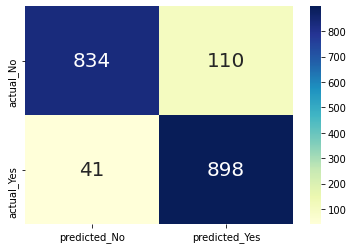

In [344]:
# #use trainset to do prediction on testset
featured_pred_knn = knn2.predict(x_knn_import_test)
featured_pred_knn_train = knn2.predict(x_knn_import_train)

#display confusion matrix for testset
featured_KNN_cm=confusion_matrix(y_test,featured_pred_knn)
sns.heatmap(featured_KNN_cm,xticklabels=['predicted_No', 'predicted_Yes'], yticklabels=['actual_No','actual_Yes'],
           annot=True, fmt='d', annot_kws={'fontsize':20},cmap="YlGnBu");
true_neg, false_pos = featured_KNN_cm[0]
true_pos, false_neg = featured_KNN_cm[1]

#print the accuracy score, recall, precision and F1 score 
print("            Trainset             Testset")
print("Accuracy:  ",accuracy_score(y_train,featured_pred_knn_train),"\t",accuracy_score(y_test,featured_pred_knn))
print("Recall:    ",recall_score(y_train,featured_pred_knn_train),"\t",recall_score(y_test,featured_pred_knn))
print("Precision: ",precision_score(y_train,featured_pred_knn_train),"\t",precision_score(y_test,featured_pred_knn))
print("F1 score:  ",f1_score(y_train,featured_pred_knn_train),"\t",f1_score(y_test,featured_pred_knn))

In [347]:
knn_acc2 = round((accuracy_score(y_test,featured_pred_knn) * 100),2)
knn_pre2 = round((precision_score(y_test,featured_pred_knn) * 100),2)
knn_rec2 = round((recall_score(y_test,featured_pred_knn) * 100),2)
knn_f12 = round((f1_score(y_test,featured_pred_knn) *100),2)
# print(knn_acc2)
# print(knn_pre2)
# print(knn_rec2)
# print(knn_f12)

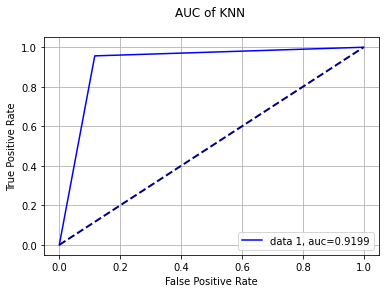

In [345]:
import sklearn.metrics as metrics

y_pred_proba =knn2.predict_proba(x_knn_import_test)
fpr_knn, tpr_knn, _ = metrics.roc_curve(y_test,  featured_pred_knn)
knn_auc2 = round(metrics.roc_auc_score(y_test, featured_pred_knn),4)
plt.plot(fpr_knn,tpr_knn,label="data 1, auc="+str(knn_auc2),color='blue')

lw = 2
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

plt.legend(loc=4)
plt.title("AUC of KNN \n")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.grid(True)
plt.show()

In [348]:
data = {'Before Dropping' : [knn_acc,knn_pre,knn_rec,knn_f1,knn_roc_auc],
        'After Dropping' : [knn_acc2,knn_pre2,knn_rec2,knn_f12,knn_auc2]}

knn_df = pd.DataFrame(data, columns= ['Before Dropping' ,'After Dropping'], 
                   index = ['Accuarcy','Precision','Recall', 'F1-Score','AUC'])

print(knn_df)

           Before Dropping  After Dropping
Accuarcy            93.310         91.9800
Precision           89.890         89.0900
Recall              97.550         95.6300
F1-Score            93.560         92.2400
AUC                  0.964          0.9199


## 4.2 Logistic Regression

Logistic regression is a statistical model that in its basic form uses a logistic function to solve the binary classification problem. Logistic regression can be used for various classification problems such as whether the patient has stroke disease or not. Logistic regression is able to generate results which is not complicated in a short time and it is easy to implement. Furthermore, logistic regression describes and estimates the relationship between one dependent binary variable and independent variables.

In order to get the best parameter, Grid Search CV was used instead of Randomised Search CV because Grid Search CV returns better results when compared to Randomised Search CV. This is highlighted when Grid Search CV returns C with value 0.01 while Randomised Search CV returns C with value 0.1 which is a larger value. Smaller C values indicate stronger regularization which is able to avoid the risk of overfitting. Therefore, Grid Search CV generates better and more accurate results when compared to Randomised Search CV.
![image](https://user-images.githubusercontent.com/67597246/115142383-17bf5e00-a074-11eb-8809-3295dc5cb9a1.png)

### Grid Search 

In [279]:
## Logistic Regression

#import the library
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import roc_auc_score,roc_curve,scorer
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score,recall_score
from sklearn.model_selection import GridSearchCV

lr = LogisticRegression()

#Train the model
parameters_lr = [{'C': [0.001,0.01,0.1,1,10,100,1000],
               'fit_intercept': [True, False],
               'tol' : [1e-5,1e-4],
               'solver' : ['newton-cg','lbfgs']}]

lr_grid = GridSearchCV(lr, parameters_lr)
lr_grid.fit(X_train, y_train)

# summarize results
print("Best: %f using %s" % (lr_grid.best_score_, lr_grid.best_params_))

Best: 0.779702 using {'C': 0.01, 'fit_intercept': False, 'solver': 'newton-cg', 'tol': 1e-05}


In [358]:
#take the best parameter from result obtained above
logreg = LogisticRegression(tol = 1e-05, C=0.01, fit_intercept = False,solver = 'newton-cg')
logreg.fit(X_train, y_train)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=False,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=1e-05, verbose=0,
                   warm_start=False)

['No' 'Yes' 'Yes' ... 'No' 'No' 'Yes']


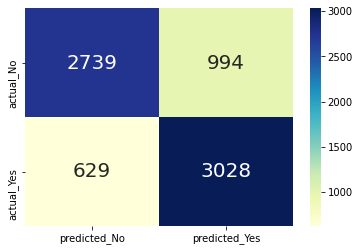

In [359]:
pred_lr_train = logreg.predict(X_train)

options = {0: "No", 1: "Yes"} 
print(np.array([options[x] for x in pred_lr_train]))

#display confusion matrix for trainset
lr_cm_train = confusion_matrix(y_train,pred_lr_train)
sns.heatmap(lr_cm_train,xticklabels=['predicted_No', 'predicted_Yes'], yticklabels=['actual_No','actual_Yes'],
           annot=True, fmt='d', annot_kws={'fontsize':20},cmap="YlGnBu");
true_neg, false_pos = lr_cm_train[0]
true_pos, false_neg = lr_cm_train[1] 

['Yes' 'Yes' 'Yes' ... 'Yes' 'Yes' 'No']
            Trainset             Testset
Accuracy:   0.7803788903924221 	 0.7721720658523632
Recall:     0.8280010937927262 	 0.8423855165069223
Precision:  0.7528592739930383 	 0.7378731343283582
F1 score:   0.7886443547336893 	 0.7866732968672303


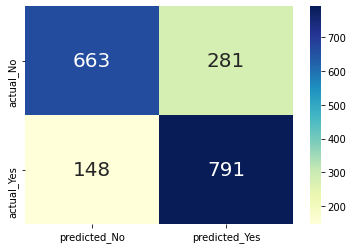

In [360]:
#Take the model that was trained on the X_train data and apply it to the X_test
pred_lr = logreg.predict(X_test)

options = {0: "No", 1: "Yes"} 
print(np.array([options[x] for x in pred_lr]))

#display confusion matrix for testset 
lr_cm = confusion_matrix(y_test,pred_lr)
sns.heatmap(lr_cm,xticklabels=['predicted_No', 'predicted_Yes'], yticklabels=['actual_No','actual_Yes'],
           annot=True, fmt='d', annot_kws={'fontsize':20},cmap="YlGnBu");
true_neg, false_pos = lr_cm[0]
true_pos, false_neg = lr_cm[1] 

#print the accuracy score, recall, precision and F1 score 
print("            Trainset             Testset")
print("Accuracy:  ",accuracy_score(y_train,pred_lr_train),"\t",accuracy_score(y_test,pred_lr))
print("Recall:    ",recall_score(y_train,pred_lr_train),"\t",recall_score(y_test,pred_lr))
print("Precision: ",precision_score(y_train,pred_lr_train),"\t",precision_score(y_test,pred_lr))
print("F1 score:  ",f1_score(y_train,pred_lr_train),"\t",f1_score(y_test,pred_lr))

In [361]:
# XY added
# testing set 
lr_acc = round((accuracy_score(y_test,pred_lr) * 100),2)
lr_pre = round((precision_score(y_test,pred_lr) * 100),2)
lr_rec = round((recall_score(y_test,pred_lr) * 100),2)
lr_f1 = round((f1_score(y_test,pred_lr) *100),2)


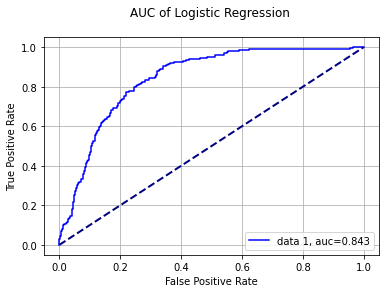

In [362]:
import sklearn.metrics as metrics

y_pred_proba =logreg.predict_proba(X_test)[::,1]
fpr_lr, tpr_lr, _ = metrics.roc_curve(y_test,  y_pred_proba)
lr_roc_auc = round(metrics.roc_auc_score(y_test, y_pred_proba),4)
plt.plot(fpr_lr,tpr_lr,label="data 1, auc="+str(lr_roc_auc),color='blue')

lw = 2
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

plt.legend(loc=4)
plt.title("AUC of Logistic Regression \n")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.grid(True)
plt.show()

Feature ranking:
---------------------
1. age (1.476644)
2. hypertension (0.317731)
3. heart_disease (0.286310)
4. avg_glucose_level (0.188814)
5. smoking_status_smokes (0.126500)
6. work_type_children (0.091241)
7. smoking_status_formerly smoked (0.059684)
8. bmi (0.019457)
9. Residence_type_Urban (0.016243)
10. work_type_Never_worked (-0.009985)
11. work_type_Private (-0.042721)
12. smoking_status_Unknown (-0.043751)
13. work_type_Govt_job (-0.048867)
14. ever_married (-0.054553)
15. gender (-0.071021)
16. work_type_Self-employed (-0.098320)
17. Residence_type_Rural (-0.124895)
18. smoking_status_never smoked (-0.251085)


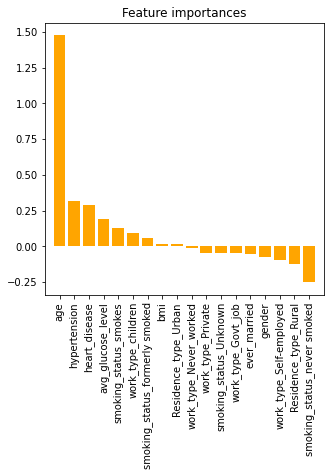

In [363]:
from matplotlib import pyplot

# get importance
importances = logreg.coef_[0]

# plot feature importance
indices = np.argsort(importances)[::-1]
feature_names = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'work_type_Govt_job', 'work_type_Never_worked', 'work_type_Private', 'work_type_Self-employed', 'work_type_children', 'Residence_type_Rural', 'Residence_type_Urban', 'smoking_status_Unknown', 'smoking_status_formerly smoked', 'smoking_status_never smoked', 'smoking_status_smokes','gender', 'ever_married']

# Print the feature ranking
print("Feature ranking:")
print("---------------------")

for f in range(X_train.shape[1]):
    print("%d. " %(f + 1) + feature_names[indices[f]] + " (%f)" % importances[indices[f]])

plt.figure(figsize=(5,5))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],color="orange",  align="center")
plt.xticks(range(X_train.shape[1]), [feature_names[i] for i in indices],rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [369]:
# Move all the continous feature data into a table
x_lr_import_train = X_train.drop(['smoking_status_formerly smoked','Residence_type_Urban','smoking_status_Unknown', 'work_type_Never_worked', 'Residence_type_Rural',
                                      'work_type_Private', 'work_type_Govt_job', 'gender', 'ever_married', 'work_type_Self-employed','smoking_status_never smoked'], axis = 1)

x_lr_import_test = X_test.drop(['smoking_status_formerly smoked','Residence_type_Urban','smoking_status_Unknown', 'work_type_Never_worked', 'Residence_type_Rural',
                                      'work_type_Private', 'work_type_Govt_job', 'gender', 'ever_married', 'work_type_Self-employed','smoking_status_never smoked'], axis = 1)


In [370]:
logreg2 = logreg.fit(x_lr_import_train, y_train)

featured_pred_lr_train = logreg2.predict(x_lr_import_train)


['Yes' 'Yes' 'Yes' ... 'Yes' 'Yes' 'No']
            Trainset             Testset
Accuracy:   0.769553450608931 	 0.7679235262878386
Recall:     0.8575334974022423 	 0.8817891373801917
Precision:  0.7262621584066697 	 0.7175043327556326
F1 score:   0.7864576802507838 	 0.7912087912087913


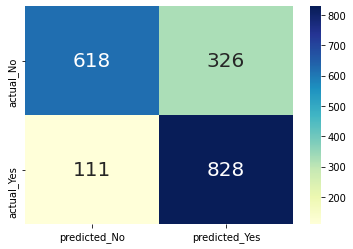

In [371]:
#Take the model that was trained on the X_train data and apply it to the X_test
featured_pred_lr = logreg2.predict(x_lr_import_test)

options = {0: "No", 1: "Yes"} 
print(np.array([options[x] for x in featured_pred_lr]))

#display confusion matrix for testset 
featured_lr_cm = confusion_matrix(y_test,featured_pred_lr)
sns.heatmap(featured_lr_cm,xticklabels=['predicted_No', 'predicted_Yes'], yticklabels=['actual_No','actual_Yes'],
           annot=True, fmt='d', annot_kws={'fontsize':20},cmap="YlGnBu");
true_neg, false_pos = featured_lr_cm[0]
true_pos, false_neg = featured_lr_cm[1] 

#print the accuracy score, recall, precision and F1 score 
print("            Trainset             Testset")
print("Accuracy:  ",accuracy_score(y_train,featured_pred_lr_train),"\t",accuracy_score(y_test,featured_pred_lr))
print("Recall:    ",recall_score(y_train,featured_pred_lr_train),"\t",recall_score(y_test,featured_pred_lr))
print("Precision: ",precision_score(y_train,featured_pred_lr_train),"\t",precision_score(y_test,featured_pred_lr))
print("F1 score:  ",f1_score(y_train,featured_pred_lr_train),"\t",f1_score(y_test,featured_pred_lr))

In [372]:
lr_acc2 = round((accuracy_score(y_test,featured_pred_lr) * 100),2)
lr_pre2 = round((precision_score(y_test,featured_pred_lr) * 100),2)
lr_rec2 = round((recall_score(y_test,featured_pred_lr) * 100),2)
lr_f12 = round((f1_score(y_test,featured_pred_lr) *100),2)


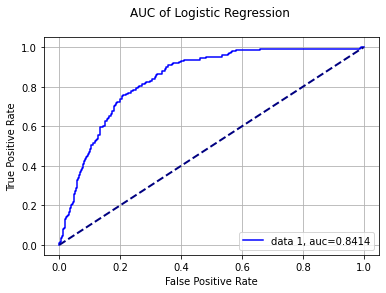

In [373]:
import sklearn.metrics as metrics

y_pred_proba =logreg2.predict_proba(x_lr_import_test)[::,1]
fpr_lr2, tpr_lr2, _ = metrics.roc_curve(y_test,  y_pred_proba)
lr_auc2 = round(metrics.roc_auc_score(y_test, y_pred_proba),4)
plt.plot(fpr_lr2,tpr_lr2,label="data 1, auc="+str(lr_auc2),color='blue')

lw = 2
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

plt.legend(loc=4)
plt.title("AUC of Logistic Regression \n")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.grid(True)
plt.show()

In [374]:
data = {'Before Dropping' : [lr_acc,lr_pre,lr_rec,lr_f1,lr_auc],
        'After Dropping' : [lr_acc2,lr_pre2,lr_rec2,lr_f12,lr_auc2]}

lr_df = pd.DataFrame(data, columns= ['Before Dropping' ,'After Dropping'], 
                   index = ['Accuarcy','Precision','Recall', 'F1-Score','AUC'])

print(lr_df)

           Before Dropping  After Dropping
Accuarcy         77.220000         76.7900
Precision        73.790000         71.7500
Recall           84.240000         88.1800
F1-Score         78.670000         79.1200
AUC               0.834494          0.8414


Then, we have also performed the feature importance to identify the insignificant variables. From the graph below, the most important one is age (0.458442) while the least important one are work_type_Never_worked (0.000000) and work_type_children (0.000000). After that, feature importance was performed to obtain the important column, those insignificant columns were then removed and the remaining column was used for modelling. However, the results obtained are worse when compared to the dataset without removing the insignificant columns.

## 4.3 Naive Bayes


The Naive Bayes classifier is a classification technique based on Bayes' Theorem. The purpose of using Naive Bayes is to predict a multi class of test data set easier and faster. Besides, Naive Bayes is able to perform better when compared with other models. The Gaussian Naive Bayes algorithm is used in this project for classification purposes and assuming the features follow by a normal distribution.

There are three types of Naive Bayes Classifier which are Multinomial Naive Bayes, Bernoulli Naive Bayes and Gaussian Naive Bayes. Thus, we will compare these three types of Naive Bayes Classifier and we have found that the scores of Bernoulli Naive Bayes is the highest which is 0.75. However, for Bernoulli Naive Bayes, it is hard to find the parameter to fit the model. Therefore, we have decided to use  Gaussian Naive Bayes to do the modelling. Besides, we have also used power transformer processing to fit the model. This Power Transformer method is used to retrieve the best hyperparameters. For instance, we have inserted the relevant hyperparameters such as var_smoothing into the parameter list in order to get the best hyperparameter in Naive Bayes Modelling. Lastly, the accuracy, precision, recall, F1-score and AUC are calculated.

![image](https://user-images.githubusercontent.com/67597246/115145090-873c4a00-a082-11eb-832c-1aa412506007.png)

In [150]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn import metrics

In [151]:
nb = {'gaussian': GaussianNB(),
      'bernoulli': BernoulliNB(),
      'multinomial': MultinomialNB()}
scores = {}
for key, model in nb.items():
    s = cross_val_score(model, X_train, y_train, cv=4, n_jobs=4, scoring='accuracy')
    scores[key] = np.mean(s)
scores

{'bernoulli': 0.7502036911383149,
 'gaussian': 0.6223282109516544,
 'multinomial': nan}

In [152]:
#Create a Gaussian Classifier
# gnb = GaussianNB()
bnb = BernoulliNB()
# mnb = MultinomialNB()

#Train the model using the training sets
bnb.fit(X_train, y_train)

y_pred = bnb.predict(X_test)

In [153]:

# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

nb_acc_test = (bnb.score(X_test, y_test)) * 100
nb_acc_train = (bnb.score(X_train, y_train)) * 100

print('NB accuracy for test set: {:.2f}%'.format(nb_acc_test))
print('NB accuracy for traning set: {:.2f}%'.format(nb_acc_train))

Accuracy: 0.7482740308019118
NB accuracy for test set: 74.83%
NB accuracy for traning set: 74.86%


In [154]:
nb_cm = confusion_matrix(y_test,y_pred)
nb_cm


array([[619, 325],
       [149, 790]])

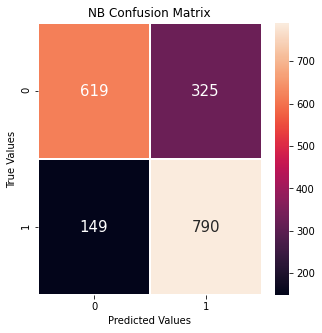

In [155]:
plt.figure(figsize=(5,5))
sns.heatmap(nb_cm, annot=True, fmt = 'd', linewidths=0.5, annot_kws = {'fontsize': 15} )
plt.title("NB Confusion Matrix")
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

In [156]:
from sklearn.metrics import classification_report,precision_score,recall_score,f1_score

y_true_nb, y_pred_nb = y_test, bnb.predict(X_test)
print(classification_report(y_true_nb, y_pred_nb))

nb_acc_test = round((bnb.score(X_test, y_test)) * 100,2)
nb_pre = round(precision_score(y_true_nb, y_pred_nb) * 100 ,2)
nb_rec = round(recall_score(y_true_nb, y_pred_nb) * 100 ,2)
nb_f1 = round(f1_score(y_true_nb, y_pred_nb) * 100 ,2)


              precision    recall  f1-score   support

           0       0.81      0.66      0.72       944
           1       0.71      0.84      0.77       939

    accuracy                           0.75      1883
   macro avg       0.76      0.75      0.75      1883
weighted avg       0.76      0.75      0.75      1883



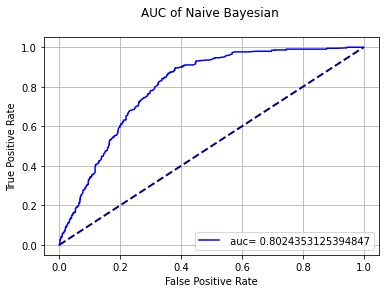

In [157]:
y_pred_proba = bnb.predict_proba(X_test)[::,1]
fpr_nb, tpr_nb, _ = metrics.roc_curve(y_test, y_pred_proba)
nb_roc_auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr_nb,tpr_nb,label=" auc= " + str(nb_roc_auc),color='blue')

lw = 2
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.legend(loc=4)
plt.title("AUC of Naive Bayesian \n")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.grid(True)
plt.show()


In [158]:
from sklearn.preprocessing import PowerTransformer
params_NB = {'var_smoothing':  np.logspace(0,-9, num=100)}
gnb = GaussianNB()
nb=gnb.fit(X_test,y_test)

gs_NB = GridSearchCV(estimator=nb, param_grid=params_NB,verbose=1,scoring='accuracy')
Data_transformed = PowerTransformer().fit_transform(X_test)
gs_NB.fit(Data_transformed, y_test)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    1.2s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=GaussianNB(priors=None, var_smoothing=1e-09),
             iid='deprecated', n_jobs=None,
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02,...
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=1)

In [159]:
gnb = GaussianNB(priors=None,var_smoothing = 0.2848035868435802)
gnb_new = gnb.fit(X_train,y_train)
pred_gnb = gnb_new.predict(X_test)

print(classification_report(pred_gnb,y_test))

              precision    recall  f1-score   support

           0       0.65      0.82      0.73       748
           1       0.86      0.71      0.78      1135

    accuracy                           0.75      1883
   macro avg       0.75      0.77      0.75      1883
weighted avg       0.78      0.75      0.76      1883



In [160]:
#Create a Gaussian Classifier
nb = GaussianNB()
params_NB = {
 'var_smoothing': np.logspace(0,-9, num=100)
}
nb_grid = GridSearchCV(nb,params_NB)
nb_grid.fit(X_train, y_train)

nb_acc_test = (nb_grid.score(X_test, y_test)) * 100
nb_acc_train = (nb_grid.score(X_train, y_train)) * 100
print('NB accuracy for test set: {:.2f}%'.format(nb_acc_test))
print('NB accuracy for traning set: {:.2f}%'.format(nb_acc_train))

NB accuracy for test set: 76.00%
NB accuracy for traning set: 76.09%


In [161]:
nb_acc_test = round((nb_grid.score(X_test, y_test)) * 100,2)
nb_pre = round(precision_score(y_true_nb, y_pred_nb) * 100 ,2)
nb_rec = round(recall_score(y_true_nb, y_pred_nb) * 100 ,2)
nb_f1 = round(f1_score(y_true_nb, y_pred_nb) * 100 ,2)

## 4.4 XGBoost

XGBoost is an implementation of gradient boosted decision trees designed for speed and performance. The goal of using XGBoost algorithm is to push the limit of computations resources for boosted tree algorithms. There are two reasons to perform XGBoost algorithm, there are model performance and execution speed. It is used to dominate structured or tabular dataset on classification and regression predictive problems. Furthermore, the speed of XGBoost is also faster than other implementations of gradient boosting.

In order to get the best hyperparameters, three tuning hyperparameter methods are used for XGBoost which are Automated Hyperparameter Tuning, Grid Search and Randomized Search. We will define a hyperparameter space by using the variable space which is relevant to XGBoost. These hyperparameter space will then be used in Automated Hyperparameter Tuning, Grid Search CV and Randomised Search CV. For the Automated Hyperparameters Tuning, the hyperot package will be used. For example, we have used the uniform distribution between 0.1 and 0.5 for parameter gamma. After running the automated hyperparameter tuning, we get the best parameters for XGBoost. Besides, we will also set a parameter list for Grid Search CV and Randomised Search CV. After comparing the accuracy of these three methods, Grid Search is used for XGBoost. 
![image](https://user-images.githubusercontent.com/67597246/115143434-de89ec80-a079-11eb-9152-4e0f76450026.png)

### Automate Hyperparameter tuning

In [310]:
# import packages for hyperparameters tuning

from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
# import machine learning libraries
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.externals import joblib

In [311]:
X, Xcv, y, ycv = train_test_split(X_train,y_train,test_size = 0.2,random_state=0)

In [312]:
from sklearn.metrics import accuracy_score
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
import numpy as np
import xgboost as xgb
def objective(space):
    # Instantiate the classifier
    clf = xgb.XGBClassifier(n_estimators =1000,colsample_bytree=space['colsample_bytree'],
                           learning_rate = .3,
                            max_depth = int(space['max_depth']),
                            min_child_weight = space['min_child_weight'],
                            subsample = space['subsample'],
                           gamma = space['gamma'],
                           reg_lambda = space['reg_lambda'])
    
    eval_set  = [( X, y), ( Xcv, ycv)]
    
    # Fit the classsifier
    clf.fit(X, y,
            eval_set=eval_set, eval_metric="rmse",
            early_stopping_rounds=10,verbose=False)
    
    # Predict on Cross Validation data
    pred = clf.predict(Xcv)
    
    # Calculate our Metric - accuracy
    accuracy = accuracy_score(ycv, pred>0.5)
# return needs to be in this below format. We use negative of accuracy since we want to maximize it.
    return {'loss': -accuracy, 'status': STATUS_OK }

In [313]:
space ={'max_depth': hp.quniform("x_max_depth", 4, 16, 1),
        'min_child_weight': hp.quniform ('x_min_child', 1, 10, 1),
        'subsample': hp.uniform ('x_subsample', 0.7, 1),
        'gamma' : hp.uniform ('x_gamma', 0.1,0.5),
        'colsample_bytree' : hp.uniform ('x_colsample_bytree', 0.7,1),
        'reg_lambda' : hp.uniform ('x_reg_lambda', 0,1)
    }

In [314]:
trials = Trials()
best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=10,
            trials=trials)
print(best)

100%|██████████| 10/10 [00:21<00:00,  2.18s/it, best loss: -0.9661705006765899]
{'x_colsample_bytree': 0.9567909985833067, 'x_gamma': 0.46320725510664496, 'x_max_depth': 9.0, 'x_min_child': 1.0, 'x_reg_lambda': 0.393056745544619, 'x_subsample': 0.8794798919330822}


In [315]:
xgb_model_auto = xgb.XGBClassifier(learning_rate =0.1,n_estimators=1000,x_colsample_bytree = 0.7534471840088773, x_gamma = 0.4802561482632648, x_max_depth = 9.0, x_min_child = 1.0, x_reg_lambda = 0.8071865911997719, x_subsample = 0.8124662684526437)
xgb_model_new_auto = xgb_model_auto.fit(X_train,y_train)
pred_xgb_auto = xgb_model_auto.predict(X_test)

In [316]:
print(classification_report(pred_xgb_auto,y_test))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94       894
           1       0.97      0.92      0.95       989

    accuracy                           0.94      1883
   macro avg       0.94      0.95      0.94      1883
weighted avg       0.95      0.94      0.94      1883



In [317]:
xgb_acc_test_auto = (xgb_model_new_auto.score(X_test, y_test)) * 100
xgb_acc_train_auto = (xgb_model_new_auto.score(X_train, y_train)) * 100
print('XGB accuracy for test set: {:.2f}%'.format(xgb_acc_test_auto))
print('XGB accuracy for traning set: {:.2f}%'.format(xgb_acc_train_auto))

XGB accuracy for test set: 94.48%
XGB accuracy for traning set: 98.01%


###Grid Search

In [170]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from datetime import datetime
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier

In [356]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
def algorithm_pipeline(X_train, X_test, y_train, y_test, 
                       model, param_grid, cv=10, scoring_fit='neg_mean_squared_error',
                       do_probabilities = False):
    gs = GridSearchCV(
        estimator=model,
        param_grid=param_grid, 
        cv=cv, 
        n_jobs=-1, 
        scoring=scoring_fit,
        verbose=2
    )
    fitted_model = gs.fit(X_train, y_train)
    
    if do_probabilities:
      pred = fitted_model.predict_proba(X_test)
    else:
      pred = fitted_model.predict(X_test)
    
    return fitted_model, pred

In [357]:
from xgboost import XGBClassifier
from xgboost import XGBRegressor

model = xgb.XGBRegressor()
param_grid = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
}

model, pred = algorithm_pipeline(X_train, X_test, y_train, y_test, model, 
                                 param_grid, cv=5)

# Root Mean Squared Error
print(np.sqrt(-model.best_score_))
print(model.best_params_)

Fitting 5 folds for each of 405 candidates, totalling 2025 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   11.9s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:   54.2s
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 1009 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 1454 tasks      | elapsed:  9.0min
[Parallel(n_jobs=-1)]: Done 1981 tasks      | elapsed: 12.9min
[Parallel(n_jobs=-1)]: Done 2025 out of 2025 | elapsed: 13.3min finished


[08:17:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.2584168041379724
{'colsample_bytree': 1.0, 'gamma': 0.5, 'max_depth': 5, 'min_child_weight': 5, 'subsample': 0.8}


In [173]:
folds = 3
param_comb = 5

print('\n All results:')
print('\n Best estimator:')
print(model.best_estimator_)
print('\n Best normalized gini score for %d-fold search with %d parameter combinations:' % (folds, param_comb))
print(model.best_score_ * 2 - 1)
print('\n Best hyperparameters:')
print(model.best_params_)


 All results:

 Best estimator:
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1.0, gamma=0.5,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=5, min_child_weight=5, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.8, verbosity=1)

 Best normalized gini score for 3-fold search with 5 parameter combinations:
-1.1335584893217663

 Best hyperparameters:
{'colsample_bytree': 1.0, 'gamma': 0.5, 'max_depth': 5, 'min_child_weight': 5, 'subsample': 0.8}


In [366]:
xgb_model = XGBClassifier(learning_rate =0.1,n_estimators=1000,gamma=0.5,max_depth=5,subsample=0.8,min_child_weight=5,colsample_bytree=1.0)
xgb_model_new = xgb_model.fit(X_train,y_train)
pred = xgb_model_new.predict(X_test)

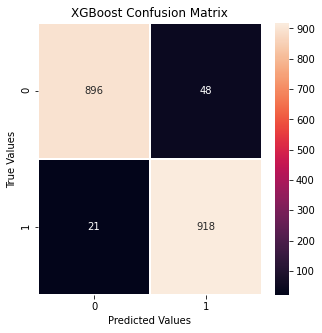

In [368]:
xgb_cm = confusion_matrix(y_test,xgb_model.predict(X_test))
xgb_cm

import matplotlib.pyplot as plt
plt.subplots(figsize=(5,5))
sns.heatmap(xgb_cm,annot=True,linewidths=0.5,fmt='d')
plt.title("XGBoost Confusion Matrix")
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

In [175]:
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       917
           1       0.98      0.95      0.96       966

    accuracy                           0.96      1883
   macro avg       0.96      0.96      0.96      1883
weighted avg       0.96      0.96      0.96      1883



In [176]:
xgb_acc_test = (xgb_model_new.score(X_test, y_test)) * 100
xgb_acc_train = (xgb_model_new.score(X_train, y_train)) * 100
print('XGB accuracy for test set: {:.2f}%'.format(xgb_acc_test))
print('XGB accuracy for traning set: {:.2f}%'.format(xgb_acc_train))

XGB accuracy for test set: 96.34%
XGB accuracy for traning set: 99.82%


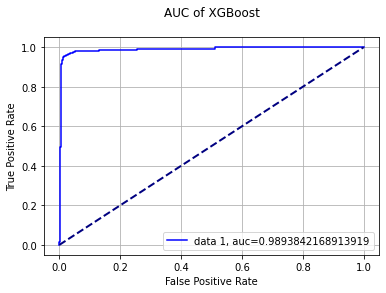

In [177]:
y_pred_proba = xgb_model_new.predict_proba(X_test)[::,1]
fpr_xgb, tpr_xgb, _ = metrics.roc_curve(y_test, y_pred_proba)
xgb_roc_auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr_xgb,tpr_xgb,label="data 1, auc="+str(xgb_roc_auc),color='blue')

lw = 2
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

plt.legend(loc=4)
plt.title("AUC of XGBoost\n")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.grid(True)
plt.show()

In [178]:

# XY added
# testing set 

y_true_xgb, y_pred_xbg = y_test, xgb_model_new.predict(X_test)

xgb_acc = round((accuracy_score(y_true_xgb, y_pred_xbg) * 100),2)
xgb_pre = round((precision_score(y_true_xgb, y_pred_xbg) * 100),2)
xgb_rec = round((recall_score(y_true_xgb, y_pred_xbg) * 100),2)
xgb_f1 = round((f1_score(y_true_xgb, y_pred_xbg) *100),2)

print(xgb_acc)
print(xgb_pre)
print(xgb_rec)
print(xgb_f1)

96.34
95.03
97.76
96.38


Feature ranking:
---------------------
1. age (0.159303)
2. work_type_children (0.096488)
3. smoking_status_never smoked (0.091024)
4. work_type_Self-employed (0.064760)
5. heart_disease (0.062607)
6. smoking_status_smokes (0.058925)
7. hypertension (0.055915)
8. ever_married (0.053948)
9. smoking_status_Unknown (0.053823)
10. avg_glucose_level (0.049464)
11. gender (0.048123)
12. bmi (0.047224)
13. work_type_Private (0.043249)
14. Residence_type_Rural (0.042770)
15. smoking_status_formerly smoked (0.036815)
16. work_type_Govt_job (0.035563)
17. Residence_type_Urban (0.000000)
18. work_type_Never_worked (0.000000)


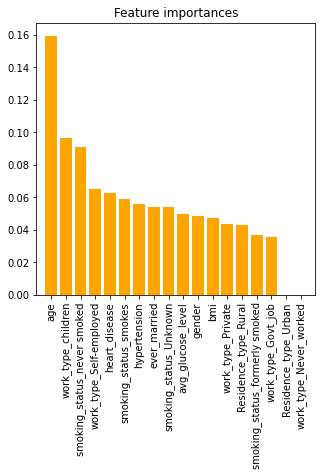

In [179]:
# XY added
importances = xgb_model_new.feature_importances_

indices = np.argsort(importances)[::-1]
feature_names = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'work_type_Govt_job', 'work_type_Never_worked', 'work_type_Private', 'work_type_Self-employed', 'work_type_children', 'Residence_type_Rural', 'Residence_type_Urban', 'smoking_status_Unknown', 'smoking_status_formerly smoked', 'smoking_status_never smoked', 'smoking_status_smokes','gender', 'ever_married']
                                                                                                                                                      
# Print the feature ranking
print("Feature ranking:")
print("---------------------")

for f in range(X_train.shape[1]):
    print("%d. " %(f + 1) + feature_names[indices[f]] + " (%f)" % importances[indices[f]])

# Plot the impurity-based feature importances of the forest
plt.figure(figsize=(5,5))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],color="orange",  align="center")
plt.xticks(range(X_train.shape[1]), [feature_names[i] for i in indices],rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [181]:
# Move all the continous feature data into a table
x_xgb_import_train = X_train.drop(['avg_glucose_level','gender','bmi','work_type_Private','Residence_type_Rural','smoking_status_formerly smoked','Residence_type_Urban','work_type_Never_worked'], axis = 1)

x_xgb_import_test = X_test.drop(['avg_glucose_level','gender','bmi','work_type_Private','Residence_type_Rural','smoking_status_formerly smoked','Residence_type_Urban','work_type_Never_worked'], axis = 1)


# x_xgb_import_test = X_test.drop(['smoking_status_formerly smoked','Residence_type_Urban','smoking_status_Unknown', 'work_type_Never_worked', 'Residence_type_Rural',
#                                       'work_type_Private', 'work_type_Govt_job', 'gender', 'ever_married', 'work_type_Self-employed','smoking_status_never smoked'], axis = 1)


In [182]:
X, Xcv, y, ycv = train_test_split(X_train,y_train,test_size = 0.2,random_state=0)
space ={'max_depth': hp.quniform("x_max_depth", 4, 16, 1),
        'min_child_weight': hp.quniform ('x_min_child', 1, 10, 1),
        'subsample': hp.uniform ('x_subsample', 0.7, 1),
        'gamma' : hp.uniform ('x_gamma', 0.1,0.5),
        'colsample_bytree' : hp.uniform ('x_colsample_bytree', 0.7,1),
        'reg_lambda' : hp.uniform ('x_reg_lambda', 0,1)
    }
trials = Trials()
best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=10,
            trials=trials)
print(best)
xgb_model_auto = xgb.XGBClassifier(learning_rate =0.1,n_estimators=1000,x_colsample_bytree = 0.7534471840088773, x_gamma = 0.4802561482632648, x_max_depth = 9.0, x_min_child = 1.0, x_reg_lambda = 0.8071865911997719, x_subsample = 0.8124662684526437)
xgb_model_new_auto = xgb_model_auto.fit(X_train,y_train)
pred_xgb_auto = xgb_model_auto.predict(X_test)

100%|██████████| 10/10 [00:21<00:00,  2.10s/it, best loss: -0.9634641407307172]
{'x_colsample_bytree': 0.881124247360492, 'x_gamma': 0.15212862673840016, 'x_max_depth': 10.0, 'x_min_child': 2.0, 'x_reg_lambda': 0.4034491148381949, 'x_subsample': 0.921869666110798}


In [183]:
model = xgb.XGBRegressor()
param_grid = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
}

model, pred = algorithm_pipeline(x_xgb_import_train, x_xgb_import_test, y_train, y_test, model, 
                                 param_grid, cv=5)

# Root Mean Squared Error
print(np.sqrt(-model.best_score_))
print(model.best_params_)

folds = 3
param_comb = 5

print('\n All results:')
print('\n Best estimator:')
print(model.best_estimator_)
print('\n Best normalized gini score for %d-fold search with %d parameter combinations:' % (folds, param_comb))
print(model.best_score_ * 2 - 1)
print('\n Best hyperparameters:')
print(model.best_params_)

xgb_model = XGBClassifier(learning_rate =0.1,n_estimators=1000,gamma=0.5,max_depth=5,subsample=0.8,min_child_weight=5,colsample_bytree=1.0)
xgb_model_new = xgb_model.fit(x_xgb_import_train,y_train)
pred = xgb_model_new.predict(x_xgb_import_test)

print(classification_report(pred,y_test))

xgb_acc_test = (xgb_model_new.score(x_xgb_import_test, y_test)) * 100
xgb_acc_train = (xgb_model_new.score(x_xgb_import_train, y_train)) * 100
print('XGB accuracy for test set: {:.2f}%'.format(xgb_acc_test))
print('XGB accuracy for traning set: {:.2f}%'.format(xgb_acc_train))

Fitting 5 folds for each of 405 candidates, totalling 2025 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:   41.1s
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 1009 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 1454 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 1981 tasks      | elapsed:  9.4min
[Parallel(n_jobs=-1)]: Done 2025 out of 2025 | elapsed:  9.7min finished


[01:42:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.31089266468092924
{'colsample_bytree': 1.0, 'gamma': 0.5, 'max_depth': 5, 'min_child_weight': 1, 'subsample': 0.6}

 All results:

 Best estimator:
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1.0, gamma=0.5,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.6, verbosity=1)

 Best normalized gini score for 3-fold search with 5 parameter combinations:
-1.1933084979048174

 Best hyperparameters:
{'colsample_bytree': 1.0, 'gamma': 0.5, 'max_depth': 5, 'min_child_weight': 1, 'subsample': 0.6}
              pr

In [184]:
xgb_acc2 = round((accuracy_score(y_true_xgb, y_pred_xbg) * 100),2)
xgb_pre2 = round((precision_score(y_true_xgb, y_pred_xbg) * 100),2)
xgb_rec2 = round((recall_score(y_true_xgb, y_pred_xbg) * 100),2)
xgb_f12 = round((f1_score(y_true_xgb, y_pred_xbg) *100),2)

print(xgb_acc2)
print(xgb_pre2)
print(xgb_rec2)
print(xgb_f12)

96.34
95.03
97.76
96.38


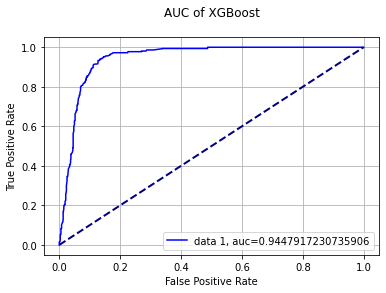

In [185]:
y_pred_proba = xgb_model_new.predict_proba(x_xgb_import_test)[::,1]
fpr_xgb, tpr_xgb, _ = metrics.roc_curve(y_test, y_pred_proba)
xgb_roc_auc2 = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr_xgb,tpr_xgb,label="data 1, auc="+str(xgb_roc_auc2),color='blue')

lw = 2
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

plt.legend(loc=4)
plt.title("AUC of XGBoost\n")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.grid(True)
plt.show()

In [186]:
data = {'Before Dropping' : [xgb_acc,xgb_pre,xgb_rec,xgb_f1,xgb_roc_auc],
        'After Dropping' : [xgb_acc2,xgb_pre2,xgb_rec2,xgb_f12,xgb_roc_auc2]}

xgb_df = pd.DataFrame(data, columns= ['Before Dropping' ,'After Dropping'], 
                   index = ['Accuarcy','Precision','Recall', 'F1-Score','AUC'])

print(xgb_df)

           Before Dropping  After Dropping
Accuarcy         96.340000       96.340000
Precision        95.030000       95.030000
Recall           97.760000       97.760000
F1-Score         96.380000       96.380000
AUC               0.989384        0.944792


## 4.5 Decision Tree (DT)



Decision Tree algorithm belongs to the family of supervised learning algorithms. Most of the supervised learning algorithms cannot be used for solving regression and classification problems, but Decision Tree algorithms are able to do so. The goal of using a decision tree is to create a training model that is usable and able to predict the class or value of the target variable by learning simple decision rules deduced from prior data which is also the training data. 

In this assignment, as usual, in order to ensure that the final result is as accurate as possible, we have applied two types of methods which are Grid Search CV and Randomised Search CV. Firstly, we put the relevant hyperparameters with a range of values into a parameter list. This parameter list will then be used by Grid Search CV and Randomised Search CV respectively and eventually be fit into the classifier. Then, the best hyperparameters with optimal value will be generated for each type of method. The mean score of the cross validation has been calculated and displayed. As a result, the accuracy result generated by using Grid Search CV is much better than that generated by using Randomised Search CV. Other than the accuracy, the precision, recall, F1-score and AUC has also been calculated.
![image](https://user-images.githubusercontent.com/67597246/115142493-a338ef00-a074-11eb-9b54-fb6679993ff6.png)

###Grid Search CV

In [202]:
# Decision Tree 
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

dt = DecisionTreeClassifier(random_state=0)

parameter_dt = {
    'max_features': ['auto','sqrt','log2'],
    'splitter': ['best', 'random'],
    'max_depth': [3, 10, 25, 40, 50],
    'criterion' : ['gini','entropy'],
    'min_samples_leaf' : range(2,20),
    'min_samples_split' : range(2,20)
}

dt_grid = GridSearchCV(dt,parameter_dt)

# Kfold cross validation
from sklearn.model_selection import cross_val_score

score = cross_val_score(dt, X_train, y_train, cv=10)
print(score)
print("\nMean Score:", score.mean())

#Fitting
dt_grid.fit(X_train, y_train)

print(dt_grid.best_estimator_)

dt_acc_test = (dt_grid.score(X_test, y_test)) * 100
dt_acc_train = (dt_grid.score(X_train, y_train)) * 100

print('DT accuracy for test set: {:.2f}%'.format(dt_acc_test))
print('DT accuracy for training set: {:.2f}%'.format(dt_acc_train))


[0.9594046  0.94993234 0.95805142 0.96481732 0.9594046  0.96481732
 0.94181326 0.96752368 0.96346414 0.96211096]

Mean Score: 0.9591339648173207
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=25, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')
DT accuracy for test set: 93.36%
DT accuracy for training set: 97.73%


In [203]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

dt_cm = confusion_matrix(y_test,dt_grid.predict(X_test))
dt_cm

array([[848,  96],
       [ 29, 910]])

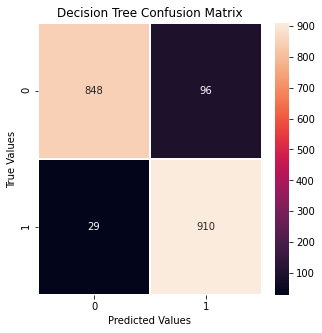

In [204]:
# Visualizing Confusion Matrix using Heatmap

import matplotlib.pyplot as plt
plt.subplots(figsize=(5,5))

sns.heatmap(dt_cm,annot=True,linewidths=0.5, fmt = 'd')

plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted Values")
plt.ylabel("True Values")

plt.show()

In [205]:
from sklearn.metrics import classification_report,precision_score,recall_score,f1_score

y_true_dt, y_pred_dt = y_test, dt_grid.predict(X_test)
print(classification_report(y_true_dt, y_pred_dt))

dt_acc_test = round(((dt_grid.score(X_test, y_test)) * 100),2)
dt_pre = round((precision_score(y_true_dt,y_pred_dt)* 100),2)
dt_rec = round((recall_score(y_true_dt,y_pred_dt) * 100),2)
dt_f1 = round((f1_score(y_true_dt,y_pred_dt) * 100),2)


              precision    recall  f1-score   support

           0       0.97      0.90      0.93       944
           1       0.90      0.97      0.94       939

    accuracy                           0.93      1883
   macro avg       0.94      0.93      0.93      1883
weighted avg       0.94      0.93      0.93      1883



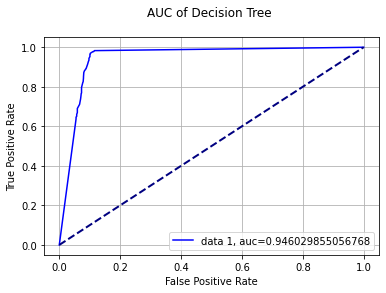

In [206]:
y_pred_proba = dt_grid.predict_proba(X_test)[::,1]
fpr_dt, tpr_dt, _ = metrics.roc_curve(y_test,  y_pred_proba)
dt_auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr_dt,tpr_dt,label="data 1, auc="+str(dt_auc),color='blue')

lw = 2
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

plt.legend(loc=4)
plt.title("AUC of Decision Tree \n")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.grid(True)
plt.show()

Feature ranking:
---------------------
1. age (0.458442)
2. avg_glucose_level (0.210823)
3. bmi (0.132383)
4. gender (0.031622)
5. smoking_status_never smoked (0.027431)
6. hypertension (0.023537)
7. work_type_Govt_job (0.020238)
8. smoking_status_formerly smoked (0.016166)
9. work_type_Private (0.013096)
10. smoking_status_Unknown (0.011639)
11. smoking_status_smokes (0.011429)
12. Residence_type_Rural (0.010000)
13. Residence_type_Urban (0.009749)
14. ever_married (0.009331)
15. heart_disease (0.007755)
16. work_type_Self-employed (0.006359)
17. work_type_Never_worked (0.000000)
18. work_type_children (0.000000)


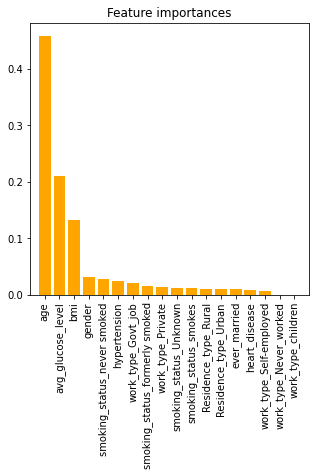

In [207]:
importances = dt_grid.best_estimator_.feature_importances_

indices = np.argsort(importances)[::-1]
feature_names = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'work_type_Govt_job', 'work_type_Never_worked', 'work_type_Private', 'work_type_Self-employed', 'work_type_children', 'Residence_type_Rural', 'Residence_type_Urban', 'smoking_status_Unknown', 'smoking_status_formerly smoked', 'smoking_status_never smoked', 'smoking_status_smokes','gender', 'ever_married']
   
# Print the feature ranking
print("Feature ranking:")
print("---------------------")

for f in range(X_train.shape[1]):
    print("%d. " %(f + 1) + feature_names[indices[f]] + " (%f)" % importances[indices[f]])

# Plot the impurity-based feature importances of the forest
plt.figure(figsize=(5,5))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],color="orange",  align="center")
plt.xticks(range(X_train.shape[1]), [feature_names[i] for i in indices],rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [208]:
# Move all the continous feature data into a table
x_dt_import_train = X_train.drop(['smoking_status_formerly smoked', 'work_type_Self-employed','work_type_Private','work_type_children','Residence_type_Urban','smoking_status_Unknown','Residence_type_Rural',
                            'smoking_status_never smoked','work_type_Govt_job','work_type_Never_worked','smoking_status_smokes'], axis = 1)


x_dt_import_test = X_test.drop(['smoking_status_formerly smoked', 'work_type_Self-employed','work_type_Private','work_type_children','Residence_type_Urban','smoking_status_Unknown','Residence_type_Rural',
                            'smoking_status_never smoked','work_type_Govt_job','work_type_Never_worked','smoking_status_smokes'], axis = 1)


In [295]:
x_dt_import_train = X_train.drop(['work_type_children','Residence_type_Urban','smoking_status_Unknown','Residence_type_Rural',
                            'smoking_status_never smoked','work_type_Govt_job','work_type_Never_worked','smoking_status_smokes'], axis = 1)


x_dt_import_test = X_test.drop(['work_type_children','Residence_type_Urban','smoking_status_Unknown','Residence_type_Rural',
                            'smoking_status_never smoked','work_type_Govt_job','work_type_Never_worked','smoking_status_smokes'], axis = 1)

In [296]:
# Decision Tree 
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

dt = DecisionTreeClassifier(random_state=0)

parameter_dt = {
    'max_features': ['auto','sqrt','log2'],
    'splitter': ['best', 'random'],
    'max_depth': [3, 10, 25, 40, 50],
    'criterion' : ['gini','entropy'],
    'min_samples_leaf' : range(2,20),
    'min_samples_split' : range(2,20)
}

dt_grid = GridSearchCV(dt,parameter_dt)

# Kfold cross validation
from sklearn.model_selection import cross_val_score

score = cross_val_score(dt, x_dt_import_train, y_train, cv=10)
print(score)
print("\nMean Score:", score.mean())

#Fitting
dt_grid.fit(x_dt_import_train, y_train)

print(dt_grid.best_estimator_)



[0.96346414 0.93775372 0.94451962 0.94451962 0.9526387  0.96752368
 0.94722598 0.96887686 0.95805142 0.96211096]

Mean Score: 0.9546684709066305
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=25, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


In [297]:
dt_acc_test2 = (dt_grid.score(x_dt_import_test, y_test)) * 100
dt_acc_train = (dt_grid.score(x_dt_import_train, y_train)) * 100

print('DT accuracy for test set: {:.2f}%'.format(dt_acc_test))
print('DT accuracy for training set: {:.2f}%'.format(dt_acc_train))

DT accuracy for test set: 92.57%
DT accuracy for training set: 97.73%


In [298]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

dt_cm = confusion_matrix(y_test,dt_grid.predict(x_dt_import_test))
dt_cm

array([[862,  82],
       [ 52, 887]])

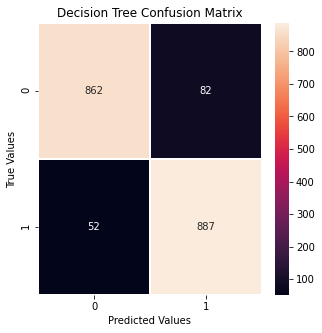

In [299]:
# Visualizing Confusion Matrix using Heatmap

import matplotlib.pyplot as plt
plt.subplots(figsize=(5,5))

sns.heatmap(dt_cm,annot=True,linewidths=0.5, fmt = 'd')

plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted Values")
plt.ylabel("True Values")

plt.show()

In [214]:
from sklearn.metrics import classification_report,precision_score,recall_score,f1_score

y_true_dt, y_pred_dt = y_test, dt_grid.predict(x_dt_import_test)
print(classification_report(y_true_dt, y_pred_dt))

dt_acc_test2 = round(((dt_grid.score(x_dt_import_test, y_test)) * 100),2)
dt_pre2 = round((precision_score(y_true_dt,y_pred_dt)* 100),2)
dt_rec2 = round((recall_score(y_true_dt,y_pred_dt) * 100),2)
dt_f12 = round((f1_score(y_true_dt,y_pred_dt) * 100),2)

              precision    recall  f1-score   support

           0       0.95      0.89      0.92       944
           1       0.90      0.96      0.93       939

    accuracy                           0.93      1883
   macro avg       0.93      0.93      0.93      1883
weighted avg       0.93      0.93      0.93      1883



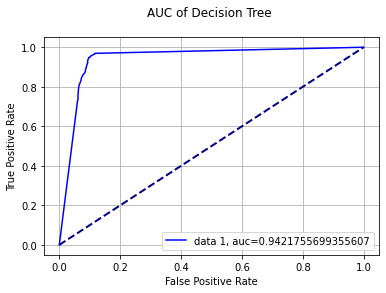

In [215]:
y_pred_proba = dt_grid.predict_proba(x_dt_import_test)[::,1]
fpr_dt2, tpr_dt2, _ = metrics.roc_curve(y_test,  y_pred_proba)
dt_auc2 = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr_dt2,tpr_dt2,label="data 1, auc="+str(dt_auc2),color='blue')

lw = 2
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

plt.legend(loc=4)
plt.title("AUC of Decision Tree \n")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.grid(True)
plt.show()

In [218]:
data = {'Before Dropping' : [dt_acc_test,dt_pre,dt_rec,dt_f1,dt_auc],
        'After Dropping' : [dt_acc_test2,dt_pre2,dt_rec2,dt_f12,dt_auc2]}

dt_df = pd.DataFrame(data, columns= ['Before Dropping' ,'After Dropping'], 
                   index = ['Accuarcy','Precision','Recall', 'F1-Score','AUC'])

print(dt_df)

           Before Dropping  After Dropping
Accuarcy         92.565056       92.565056
Precision        90.460000       89.990000
Recall           96.910000       95.740000
F1-Score         93.570000       92.780000
AUC               0.946030        0.942176


Then, we have also performed the feature importance to identify the insignificant variables. From the graph below, the most important one is age (0.458442) while the least important one is work_type_Never_worked (0.000000) and work_type_children (0.000000). After dropping the insignificant one, we will execute the program again. The accuracy after dropping the insignificant variables are lower than that before dropping. Hence, we have decided to stick to the initial result which is without dropping the insignificant variables.

## 4.6 Support Vector Machine (SVM)
Support Vector Machine (SVM) is considered a classification approach. It is one of the most popular and commonly used supervised machine learning algorithms. It offers results with higher accuracy as compared to other algorithms. SVM is useful in handling continuous and categorical variables. It uses the technique called kernel trick to transform the data and form an optimal boundary between the possible outputs. The boundary is better known as the hyperplane. After forming the hyperplane, the classifier will use it to separate the data points with the largest amount of margin. The data points which are closest to the hyperplane are called the support vectors. The main objective of SVM is to determine the best hyperlane that produces the largest margin. This is to accurately segregate the given dataset into a few classes. The larger the margin, the better the SVM is. In our case study, the hyperplane should be placed between the group “yes” or “no”

In this assignment, we have applied Grid Search CV technique to find the optimal hyperparameters and eventually get a better result.  Firstly, we would give a range of values to the SVC and it will help to determine the optimal C value. The higher the C value, the higher the accuracy. After that, we would put the C hyperparameter together with other hyperparameters such as gamma and kernel into the parameter list. The parameter list will then be used by the Grid Search CV to identify each of the optimal values. The result obtained is quite satisfying. Other than the accuracy, the precision, recall, F1-score and AUC has also been calculated. No feature importance is done as the kernel used in this SVM is Radial Basis Function (RBF) kernel
![image](https://user-images.githubusercontent.com/67597246/115142520-bcda3680-a074-11eb-8b00-c63e24cebeba.png)

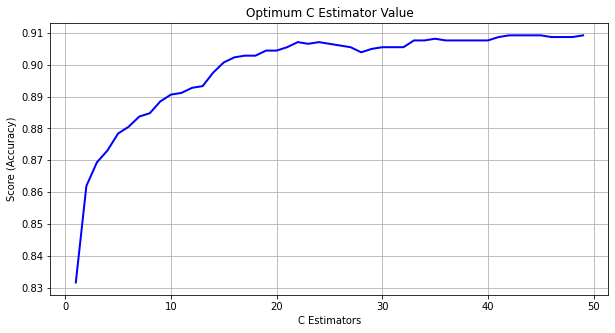

In [219]:
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import svm, metrics
#Find Optimum C value
scores = []
for i in range(1,50):
  svm = SVC(C = i,random_state=0)
  svm.fit(X_train,y_train)
  scores.append(svm.score(X_test,y_test))

plt.figure(1, figsize=(10, 5))
plt.plot(range(1,50),scores,color="blue",linewidth=2)
plt.title("Optimum C Estimator Value")
plt.xlabel("C Estimators")
plt.ylabel("Score (Accuracy)")
plt.grid(True)
plt.show()

In [220]:
from sklearn.model_selection import GridSearchCV
svm = SVC(probability=True)

parameter_svm = {
  'gamma': ['auto', 'scale'],
  'C': [0.01, 0.1, 10, 100],
  'kernel': ['rbf','sigmoid','linear']
}

svm_grid = GridSearchCV(svm,parameter_svm)
svm_grid.fit(X_train, y_train)
svm_acc_test = (svm_grid.score(X_test, y_test)) * 100
svm_acc_train = (svm_grid.score(X_train, y_train)) * 100

print('SVM accuracy for test set: {:.2f}%'.format(svm_acc_test))
print('SVM accuracy for training set: {:.2f}%'.format(svm_acc_train))

# print best parameter after tuning
print(svm_grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(svm_grid.best_estimator_)

SVM accuracy for test set: 91.24%
SVM accuracy for training set: 94.83%
{'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}
SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)


In [221]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

svm_cm = confusion_matrix(y_test,svm_grid.predict(X_test))
svm_cm

array([[828, 116],
       [ 49, 890]])

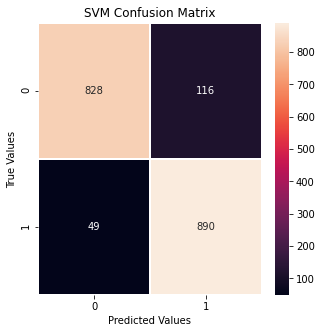

In [222]:
# Visualizing Confusion Matrix using Heatmap

import matplotlib.pyplot as plt
plt.subplots(figsize=(5,5))
sns.heatmap(svm_cm,annot=True,linewidths=0.5,fmt='d')
plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

In [223]:
from sklearn.metrics import classification_report

y_true_svc, y_pred_svc = y_test, svm_grid.predict(X_test)
print(classification_report(y_true_svc, y_pred_svc))

svm_acc_test = round((svm_grid.score(X_test, y_test)) * 100,2)
svm_pre = round(precision_score(y_true_svc, y_pred_svc) * 100,2)
svm_rec = round(recall_score(y_true_svc, y_pred_svc) * 100,2)
svm_f1 = round(f1_score(y_true_svc, y_pred_svc) * 100,2)

              precision    recall  f1-score   support

           0       0.94      0.88      0.91       944
           1       0.88      0.95      0.92       939

    accuracy                           0.91      1883
   macro avg       0.91      0.91      0.91      1883
weighted avg       0.91      0.91      0.91      1883



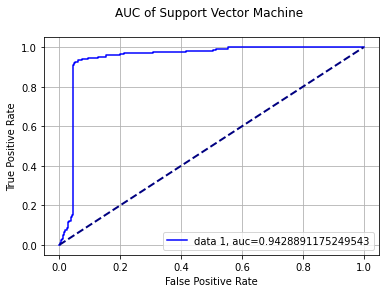

In [224]:
y_pred_proba = svm_grid.predict_proba(X_test)[::,1]
fpr_svm, tpr_svm, _ = metrics.roc_curve(y_test, y_pred_proba)
svm_roc_auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr_svm,tpr_svm,label="data 1, auc="+str(svm_roc_auc),color='blue')

lw = 2
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

plt.legend(loc=4)
plt.title("AUC of Support Vector Machine \n")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.grid(True)
plt.show()

## 4.7 Random Forest (RF)

Random Forest is one of the supervised learning algorithms. It is an ensemble learning method for classification, regression and other tasks that is operated by constructing a multitude of decision trees at training time. The “forest” the model builds is an ensemble of decision trees, usually trained with the “bagging” method. The general idea of the bagging method is that it increases the overall results from a combination of learning models. It creates as many trees on the subset of the data and combines the output of all the trees. Therefore, by using Random Forest Classifier, the overfitting problem and variance in a single decision tree can be reduced hence the accuracy can be improved.Besides, it can automatically handle the missing value and works well in both categorical and continuous data in order to maintains accuracy when large proportion of the data are missing from the dataset given. The random forest algorithm is very stable. Even if new data points are introduced in the data set, the overall algorithm will not be affected too much, because the new data may affect one tree, but it is difficult to affect all the trees.

In order to get the best hyperparameters, four tuning hyperparameter methods are used for Random Forest which are manual hyperparameter tuning, automated hyperparameter tuning, Randomised Search CV and Grid Search CV.  First, for the manual hyperparameter tuning,  we just try to test what is the accuracy for the model without any parameter list. After that, we put in some parameters to fit the model. For the automated hyperparameter tuning, we are using the Bayesian Optimization method to find the parameter and with 78.01%. In order to improve the accuracy, we have tried to use the Randomised Search CV to randomly pick the number in the range of the parameter that we fit the model. The overall performance metric is quite good for using a Randomised Search CV. However, to double confirm the parameter list, we have put the best parameter list that is generated from Randomised Search CV into the Grid Search CV and make comparison  After comparing the accuracy of these three methods, Grid Search is used for Random Forest. 

![image](https://user-images.githubusercontent.com/67597246/115142642-7e914700-a075-11eb-88f8-fcb03427c3cc.png)

### Randomized Search Cv

In [236]:

import numpy as np
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 2000, num = 30)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,30)]

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

{'n_estimators': [10, 78, 147, 215, 284, 353, 421, 490, 558, 627, 696, 764, 833, 902, 970, 1039, 1107, 1176, 1245, 1313, 1382, 1451, 1519, 1588, 1656, 1725, 1794, 1862, 1931, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 44, 78, 112, 146, 180, 214, 248, 283, 317, 351, 385, 419, 453, 487, 522, 556, 590, 624, 658, 692, 726, 761, 795, 829, 863, 897, 931, 965, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [237]:

rf=RandomForestClassifier()
rf_randomcv = RandomizedSearchCV(estimator=rf, param_distributions=random_grid, n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)
### fit the randomized model
rf_randomcv.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  9.3min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 18.6min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [238]:
rf_randomcv.best_params_

{'criterion': 'entropy',
 'max_depth': 351,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 1656}

In [239]:
best_random_grid=rf_randomcv.best_estimator_

In [240]:
from sklearn.metrics import accuracy_score
y_pred=best_random_grid.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report:\n {}".format(classification_report(y_test,y_pred)))

[[923  21]
 [ 30 909]]
Accuracy Score 0.9729155602761551
Classification report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.97       944
           1       0.98      0.97      0.97       939

    accuracy                           0.97      1883
   macro avg       0.97      0.97      0.97      1883
weighted avg       0.97      0.97      0.97      1883



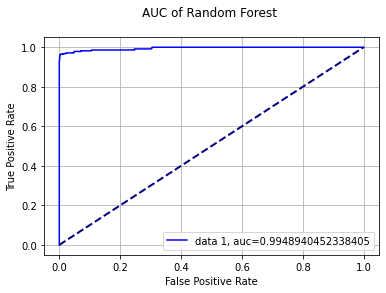

In [241]:
y_pred_proba = best_random_grid.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
rf_auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(rf_auc),color='blue')
lw = 2
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.legend(loc=4)
plt.title("AUC of Random Forest \n")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.grid(True)
plt.show()

Feature ranking:
---------------------
1. age (0.371501)
2. avg_glucose_level (0.213588)
3. bmi (0.165796)
4. ever_married (0.029746)
5. gender (0.026999)
6. hypertension (0.024079)
7. heart_disease (0.020714)
8. smoking_status_never smoked (0.018271)
9. work_type_Private (0.015882)
10. work_type_children (0.015490)
11. work_type_Self-employed (0.014912)
12. smoking_status_formerly smoked (0.014696)
13. Residence_type_Urban (0.014569)
14. Residence_type_Rural (0.014382)
15. smoking_status_Unknown (0.014156)
16. smoking_status_smokes (0.013308)
17. work_type_Govt_job (0.011759)
18. work_type_Never_worked (0.000152)


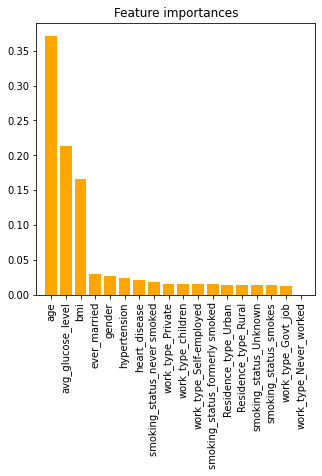

In [242]:
importances = best_random_grid.feature_importances_

indices = np.argsort(importances)[::-1]
feature_names = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'work_type_Govt_job', 'work_type_Never_worked', 'work_type_Private', 'work_type_Self-employed', 'work_type_children', 'Residence_type_Rural', 'Residence_type_Urban', 'smoking_status_Unknown', 'smoking_status_formerly smoked', 'smoking_status_never smoked', 'smoking_status_smokes','gender', 'ever_married']
            
# Print the feature ranking
print("Feature ranking:")
print("---------------------")

for f in range(X_train.shape[1]):
    print("%d. " %(f + 1) + feature_names[indices[f]] + " (%f)" % importances[indices[f]])

# Plot the impurity-based feature importances of the forest
plt.figure(figsize=(5,5))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],color="orange",  align="center")
plt.xticks(range(X_train.shape[1]), [feature_names[i] for i in indices],rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

### GridSearch CV

In [381]:
rf_randomcv.best_params_

{'criterion': 'entropy',
 'max_depth': 351,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 1656}

In [382]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': [rf_randomcv.best_params_['criterion']],
    'max_depth': [rf_randomcv.best_params_['max_depth']],
    'max_features': [rf_randomcv.best_params_['max_features']],
    'min_samples_leaf': [rf_randomcv.best_params_['min_samples_leaf'], 
                         rf_randomcv.best_params_['min_samples_leaf']+2, 
                         rf_randomcv.best_params_['min_samples_leaf'] + 4],
    'min_samples_split': [rf_randomcv.best_params_['min_samples_split'] - 2,
                          rf_randomcv.best_params_['min_samples_split'] - 1,
                          rf_randomcv.best_params_['min_samples_split'], 
                          rf_randomcv.best_params_['min_samples_split'] +1,
                          rf_randomcv.best_params_['min_samples_split'] + 2],
    'n_estimators': [rf_randomcv.best_params_['n_estimators'] - 200, rf_randomcv.best_params_['n_estimators'] - 100, 
                     rf_randomcv.best_params_['n_estimators'], 
                     rf_randomcv.best_params_['n_estimators'] + 100, rf_randomcv.best_params_['n_estimators'] + 200]
}

print(param_grid)

{'criterion': ['entropy'], 'max_depth': [351], 'max_features': ['sqrt'], 'min_samples_leaf': [1, 3, 5], 'min_samples_split': [0, 1, 2, 3, 4], 'n_estimators': [1456, 1556, 1656, 1756, 1856]}


In [383]:
def randomForest(X_train,X_test,y_train,y_test):
  
  rf=RandomForestClassifier()
  grid_search=GridSearchCV(estimator=rf,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
  grid_search.fit(X_train,y_train)
  
  best_grid=grid_search.best_estimator_
  print(best_grid)

  y_pred = best_grid.predict(X_test)

  print(confusion_matrix(y_test,y_pred))
  print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
  print("Classification report: \n{}".format(classification_report(y_test,y_pred)))
  
  rf_acc2 = round(accuracy_score(y_test,y_pred) * 100,2)
  rf_pre2 = round(precision_score(y_test,y_pred) * 100 ,2)
  rf_rec2 = round(recall_score(y_test,y_pred) * 100 ,2)
  rf_f12 = round(f1_score(y_test,y_pred) * 100,2) 

  y_pred_proba = best_grid.predict_proba(X_test)[::,1]
  fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
  rf_auc2 = metrics.roc_auc_score(y_test, y_pred_proba)
  plt.plot(fpr,tpr,label="data 1, auc="+str(rf_auc2),color='blue')
  lw = 2
  plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
  plt.legend(loc=4)
  plt.title("AUC of Random Forest \n")
  plt.ylabel("True Positive Rate")
  plt.xlabel("False Positive Rate")
  plt.grid(True)
  plt.show()

In [384]:

#### Fit the grid_search to the data
rf=RandomForestClassifier()
grid_search=GridSearchCV(estimator=rf,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search.fit(X_train,y_train)

Fitting 10 folds for each of 75 candidates, totalling 750 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   24.5s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 10.0min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed: 27.2min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed: 55.1min
[Parallel(n_jobs=-1)]: Done 750 out of 750 | elapsed: 70.4min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rand

In [385]:
best_grid=grid_search.best_estimator_
best_grid

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=351, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=1456,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [386]:
y_pred=best_grid.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: \n{}".format(classification_report(y_test,y_pred)))

[[926  18]
 [ 30 909]]
Accuracy Score 0.9745087626128518
Classification report: 
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       944
           1       0.98      0.97      0.97       939

    accuracy                           0.97      1883
   macro avg       0.97      0.97      0.97      1883
weighted avg       0.97      0.97      0.97      1883



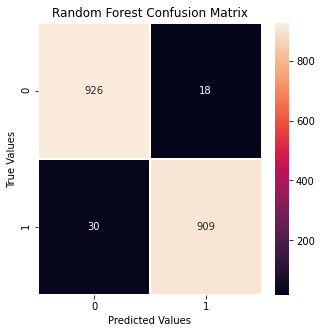

In [387]:
rf_cm = confusion_matrix(y_test,best_grid.predict(X_test))
rf_cm

import matplotlib.pyplot as plt
plt.subplots(figsize=(5,5))
sns.heatmap(rf_cm,annot=True,linewidths=0.5,fmt='d')
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

In [388]:
pred_rf_train = best_grid.predict(X_train)
pred_rf = best_grid.predict(X_test)

print("            Trainset             Testset")
print("Accuracy:  ",accuracy_score(y_train,pred_rf_train),"\t",accuracy_score(y_test,pred_rf))
print("Recall:    ",recall_score(y_train,pred_rf_train),"\t",recall_score(y_test,pred_rf))
print("Precision: ",precision_score(y_train,pred_rf_train),"\t",precision_score(y_test,pred_rf))
print("F1 score:  ",f1_score(y_train,pred_rf_train),"\t",f1_score(y_test,pred_rf))

            Trainset             Testset
Accuracy:   1.0 	 0.9745087626128518
Recall:     1.0 	 0.9680511182108626
Precision:  1.0 	 0.9805825242718447
F1 score:   1.0 	 0.9742765273311897


In [389]:
rf_acc = round(accuracy_score(y_test,y_pred) * 100,2)
rf_pre = round(precision_score(y_test,y_pred) * 100 ,2)
rf_rec = round(recall_score(y_test,y_pred) * 100 ,2)
rf_f1 = round(f1_score(y_test,y_pred) * 100,2) 

In [390]:
# print(rf_acc)
# print(rf_pre)
# print(rf_rec)
# print(rf_f1)

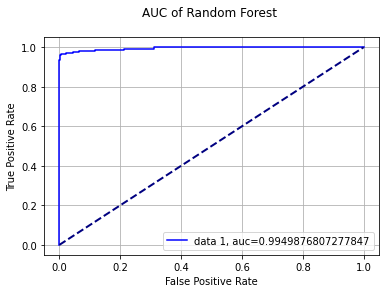

In [391]:
y_pred_proba = best_grid.predict_proba(X_test)[::,1]
fpr_rf, tpr_rf, _ = metrics.roc_curve(y_test, y_pred_proba)
rf_auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr_rf,tpr_rf,label="data 1, auc="+str(rf_auc),color='blue')
lw = 2
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.legend(loc=4)
plt.title("AUC of Random Forest \n")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.grid(True)
plt.show()

In [392]:
# new xy 
def featureImportance(algorithm_fit, X_train):
  
  importances = algorithm_fit.feature_importances_

  indices = np.argsort(importances)[::-1]
  feature_names = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'work_type_Govt_job', 'work_type_Never_worked', 'work_type_Private', 'work_type_Self-employed', 'work_type_children', 'Residence_type_Rural', 'Residence_type_Urban', 'smoking_status_Unknown', 'smoking_status_formerly smoked', 'smoking_status_never smoked', 'smoking_status_smokes','gender', 'ever_married']
                                                                                                                                                          
  # Print the feature ranking
  print("Feature ranking:")
  print("---------------------")

  for f in range(X_train.shape[1]):
    print("%d. " %(f + 1) + feature_names[indices[f]] + " (%f)" % importances[indices[f]])

  # Plot the impurity-based feature importances of the forest
  plt.figure(figsize=(5,5))
  plt.title("Feature importances")
  plt.bar(range(X_train.shape[1]), importances[indices],color="orange",  align="center")
  plt.xticks(range(X_train.shape[1]), [feature_names[i] for i in indices],rotation=90)
  plt.xlim([-1, X_train.shape[1]])
  plt.show()

Feature ranking:
---------------------
1. age (0.369685)
2. avg_glucose_level (0.214750)
3. bmi (0.164828)
4. ever_married (0.030567)
5. gender (0.027019)
6. hypertension (0.024530)
7. heart_disease (0.020964)
8. smoking_status_never smoked (0.018594)
9. work_type_Private (0.015983)
10. work_type_children (0.015808)
11. work_type_Self-employed (0.014818)
12. smoking_status_formerly smoked (0.014518)
13. Residence_type_Rural (0.014200)
14. smoking_status_Unknown (0.014071)
15. Residence_type_Urban (0.014036)
16. smoking_status_smokes (0.013482)
17. work_type_Govt_job (0.012012)
18. work_type_Never_worked (0.000135)


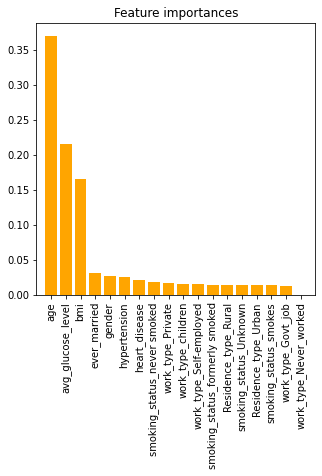

In [393]:
importances = best_grid.feature_importances_

indices = np.argsort(importances)[::-1]
feature_names = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'work_type_Govt_job', 'work_type_Never_worked', 'work_type_Private', 'work_type_Self-employed', 'work_type_children', 'Residence_type_Rural', 'Residence_type_Urban', 'smoking_status_Unknown', 'smoking_status_formerly smoked', 'smoking_status_never smoked', 'smoking_status_smokes','gender', 'ever_married']
                                                                                                                                                         
# Print the feature ranking
print("Feature ranking:")
print("---------------------")

for f in range(X_train.shape[1]):
    print("%d. " %(f + 1) + feature_names[indices[f]] + " (%f)" % importances[indices[f]])

# Plot the impurity-based feature importances of the forest
plt.figure(figsize=(5,5))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],color="orange",  align="center")
plt.xticks(range(X_train.shape[1]), [feature_names[i] for i in indices],rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [394]:
# Move all the continous feature data into a table
x_rd_import_train = X_train.drop(['smoking_status_formerly smoked', 'work_type_Self-employed','work_type_Private','work_type_children','Residence_type_Urban','smoking_status_Unknown','Residence_type_Rural',
                            'smoking_status_never smoked','work_type_Govt_job','work_type_Never_worked','smoking_status_smokes'], axis = 1)


x_rd_import_test = X_test.drop(['smoking_status_formerly smoked', 'work_type_Self-employed','work_type_Private','work_type_children','Residence_type_Urban','smoking_status_Unknown','Residence_type_Rural',
                            'smoking_status_never smoked','work_type_Govt_job','work_type_Never_worked','smoking_status_smokes'], axis = 1)



Fitting 10 folds for each of 75 candidates, totalling 750 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   23.5s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 10.0min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed: 27.1min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed: 54.9min
[Parallel(n_jobs=-1)]: Done 750 out of 750 | elapsed: 70.1min finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=351, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1756,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
[[912  32]
 [ 34 905]]
Accuracy Score 0.9649495485926712
Classification report: 
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       944
           1       0.97      0.96      0.96       939

    accuracy                           0.96      1883
   macro avg       0.96      0.96      0.96      1883
weighted avg       0.96      0.96      0.96      1883



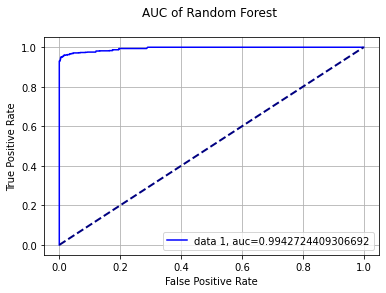

In [395]:
randomForest(x_rd_import_train,x_rd_import_test,y_train,y_test)

Besides, we have also performed the feature importance to determine which variable is the most significant. Based on the graph above, we can know that the age is the most significant variable among all with 0.36985. While the least significant variable is work_type_Never_worked with 0.000135. After determining the significance variables, we try to drop the some insignificant variable and execute the program again to check the performance metric. The accuracy, precision, recall and f1 score are lower than the previous one. Therefore, we decided to use back the previous model without dropping any variable 

## 4.8 Neural Network 

The Neural Network is having fault tolerance. Corruption of one or more cells of the Neural Network does not prevent it from generating output. This feature makes the networks fault tolerant. Neutral Networkhabe parallel processing capability.  Neural Networks have numerical strength that can perform more than one job at the same time.

In a neutral network, we put 2 hidden layers with 15 units and 6 units by using relu activation and uniform kernal_initializer. After that, we apply Adam optimizer on the whole  Neural Network. 

![image](https://user-images.githubusercontent.com/67597246/115142706-c0ba8880-a075-11eb-9cbd-3d3632c0d00c.png)

In [256]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.optimizers import SGD
from keras.optimizers import RMSprop


In [257]:
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 15, kernel_initializer = 'uniform', activation = 'relu', input_dim =  X_train.shape[1]))

# Adding the second hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN | means applying SGD on the whole ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size = 10, epochs = 1000, verbose = 0)

loss, acc = classifier.evaluate(X_train, y_train, batch_size=10)
print('Train loss:', loss)
print('Train accuracy:', acc)

# Part 3 - Making predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

print('*'*20)

loss, acc = classifier.evaluate(X_test, y_test, batch_size=10)
print('Test loss:', loss)
print('Test accuracy:', acc)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
ANN_cm = confusion_matrix(y_test, y_pred)
ANN_cm


739/739 [==============================] - 1s 975us/step - loss: 0.2539 - accuracy: 0.8926
Train loss: 0.25393742322921753
Train accuracy: 0.8925575017929077
********************
189/189 [==============================] - 0s 1ms/step - loss: 0.4209 - accuracy: 0.8720
Test loss: 0.4208923578262329
Test accuracy: 0.872012734413147


array([[737, 207],
       [ 34, 905]])

In [258]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 15)                285       
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 96        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 7         
Total params: 388
Trainable params: 388
Non-trainable params: 0
_________________________________________________________________


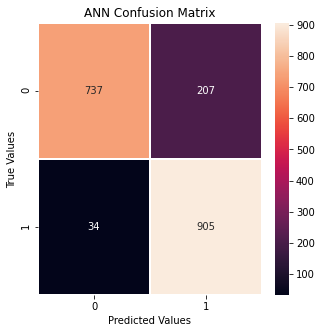

In [259]:
import matplotlib.pyplot as plt
plt.subplots(figsize=(5,5))
sns.heatmap(ANN_cm,annot=True,linewidths=0.5,fmt='d')
plt.title("ANN Confusion Matrix")
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

In [260]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

print(classification_report(y_test, y_pred))

ann_acc = round((accuracy_score(y_test,y_pred) * 100),2) 
ann_pre = round((precision_score(y_test, y_pred)* 100),2) 
ann_rec = round((recall_score(y_test, y_pred) * 100),2) 
ann_f1 = round((f1_score(y_test, y_pred) * 100),2) 

              precision    recall  f1-score   support

           0       0.96      0.78      0.86       944
           1       0.81      0.96      0.88       939

    accuracy                           0.87      1883
   macro avg       0.88      0.87      0.87      1883
weighted avg       0.89      0.87      0.87      1883



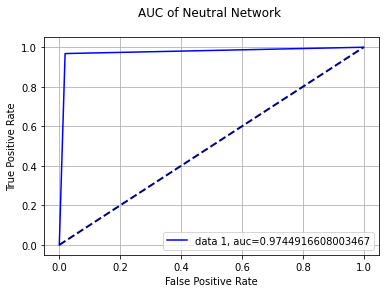

In [322]:
# y_pred_proba = classifier.predict_proba(X_test)[::,1]
fpr_ann, tpr_ann, _ = metrics.roc_curve(y_test, y_pred)
ann_roc_auc = metrics.roc_auc_score(y_test, y_pred)
plt.plot(fpr_ann,tpr_ann,label="data 1, auc="+str(ann_roc_auc),color='blue')

lw = 2
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.legend(loc=4)
plt.title("AUC of Neutral Network \n")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.grid(True)
plt.show()

In [266]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score

clf = MLPClassifier(hidden_layer_sizes=(10, 10, 10), random_state=1, max_iter=1000, activation='relu', solver='adam')
clf.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(10, 10, 10), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [268]:
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred))

ann_acc = round((accuracy_score(y_test,y_pred) * 100),2) 
ann_pre = round((precision_score(y_test, y_pred)* 100),2) 
ann_rec = round((recall_score(y_test, y_pred) * 100),2) 
ann_f1 = round((f1_score(y_test, y_pred) * 100),2) 

[[736 208]
 [ 64 875]]
              precision    recall  f1-score   support

           0       0.92      0.78      0.84       944
           1       0.81      0.93      0.87       939

    accuracy                           0.86      1883
   macro avg       0.86      0.86      0.85      1883
weighted avg       0.86      0.86      0.85      1883



# Chapter 5 Evaluation 


In [337]:
# Visualization
import plotly
import plotly.express as px 
import plotly.io as pio 
import plotly.offline as py 
import plotly.graph_objs as go 
import plotly.tools as tls 
import plotly.figure_factory as ff 

def model_report(acc, pre, recall, f1, roc, name):

    df = pd.DataFrame({"Model"           : [name],
                       "Accuracy"        : [acc],
                       "Recall"          : [recall],
                       "Precision"       : [pre],
                       "F1 Score"        : [f1],
                       "ROC-AUC"         : [roc]
                      })
    return df

#outputs for every model
model1 = model_report(knn_acc, knn_pre, knn_rec, knn_f1, knn_roc_auc, "KNN Classifier")
model2 = model_report(lr_acc, lr_pre, lr_rec, lr_f1, lr_roc_auc, "Logistic Regression")
model3 = model_report(svm_acc_test, svm_pre, svm_rec, svm_f1, svm_roc_auc, "SVM Classifier")
model4 = model_report(dt_acc_test, dt_pre, dt_rec, dt_f1, dt_auc, "Decision Tree")
model5 = model_report(xgb_acc, xgb_pre, xgb_rec, xgb_f1, xgb_roc_auc, "XGBoost")
model6 = model_report(nb_acc_test, nb_pre, nb_rec, nb_f1, nb_roc_auc, "Naive Bayes")
model7 = model_report(rf_acc, rf_pre, rf_rec, rf_f1, rf_auc, "Random Forest")
model8 = model_report(ann_acc, ann_pre, ann_rec, ann_f1, ann_roc_auc, "Neutral Network")


# Concat all models
# model_performances = pd.concat([model1, model2, model3,model5,model6],axis = 0).reset_index()

model_performances = pd.concat([model1, model2, model3, model4, model5, model6,model7, model8],axis = 0).reset_index()

model_performances = model_performances.drop(columns = "index", axis = 1)

table  = ff.create_table(np.round(model_performances, 4))
# model_performances
py.iplot(table)

In [288]:
name = ['KNN','Logistic Regression','Decision Tree','Random Forest','SVM', 'Naive Bayes', 'XGBoost','Neutral Network']

acc_all = [(al)for al in [knn_acc, lr_acc, dt_acc_test, rf_acc, svm_acc_test, nb_acc_test, xgb_acc, ann_acc]]
pre_all = [(al)for al in [knn_pre, lr_pre, dt_pre, rf_pre,svm_pre, nb_pre, xgb_pre,ann_pre]]
rec_all = [(al)for al in [knn_rec, lr_rec, dt_rec, rf_rec,svm_rec, nb_rec, xgb_rec,ann_rec]]
f1_all = [(al)for al in [knn_f1, lr_f1, dt_f1, rf_f1,svm_f1, nb_f1, xgb_f1, ann_f1 ]]
auc_all = [(al)for al in [knn_roc_auc, lr_roc_auc, dt_auc, rf_auc,svm_roc_auc, nb_roc_auc, xgb_roc_auc, ann_roc_auc ]]

## 5.1 Accuracy
Accuracy is the measuring of all the correctly predicted observations in individual models. It is the most obvious metric to evaluate the model between each other. If the accuracy is high enough, then the model is considered a good model. However, we cannot directly conclude that the algorithm with highest accuracy is the best model among all the algorithms. We can only make conclusions after investigating the precision, recall, F1-score and Area Under Curve (AUC).


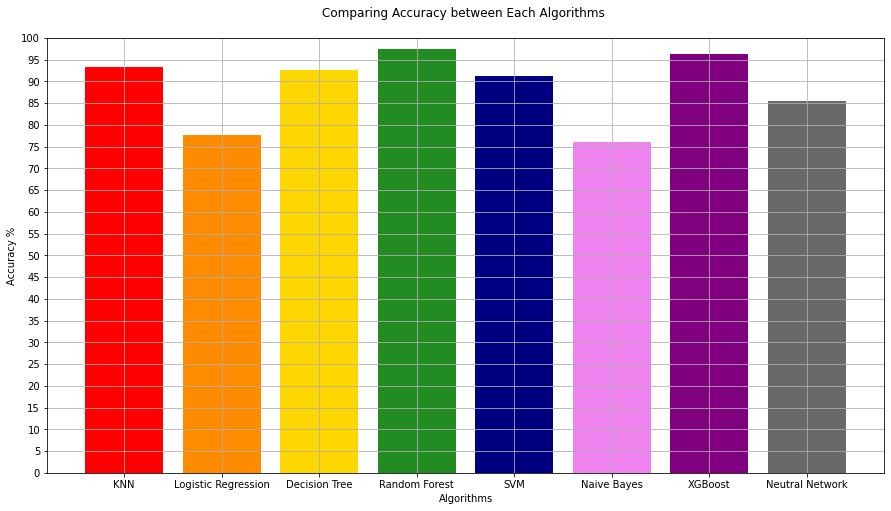

[93.31, 77.59, 92.56505576208178, 97.45, 91.24, 76.0, 96.34, 85.55]


In [301]:
plt.figure(figsize=(15,8))
plt.grid(True)
plt.bar(x=name, height=acc_all, color=['red','darkorange', 'gold','forestgreen','navy','violet','purple','dimgray'])
plt.xticks()
plt.ylim((0,100))
plt.yticks(np.arange(0,105,5))
plt.title("Comparing Accuracy between Each Algorithms \n")
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
plt.show()
print(acc_all)


From the diagram, we can see that the accuracy of all the models used is above 75%. This indicates that all the models are quite accurate. The model with the highest accuracy is Random Forest (97.45%) while the model with the lowest accuracy is Naive Bayes (76.0%). 

## 5.2 Precision 
Precision refers to how consistent the results are. It is also the degree of measuring prediction to record consistency reading for each algorithm by using the same way. Precision is a valid choice of evaluation metric when we would like to get a reliable and true prediction. High precision relates to the low false positive rate.


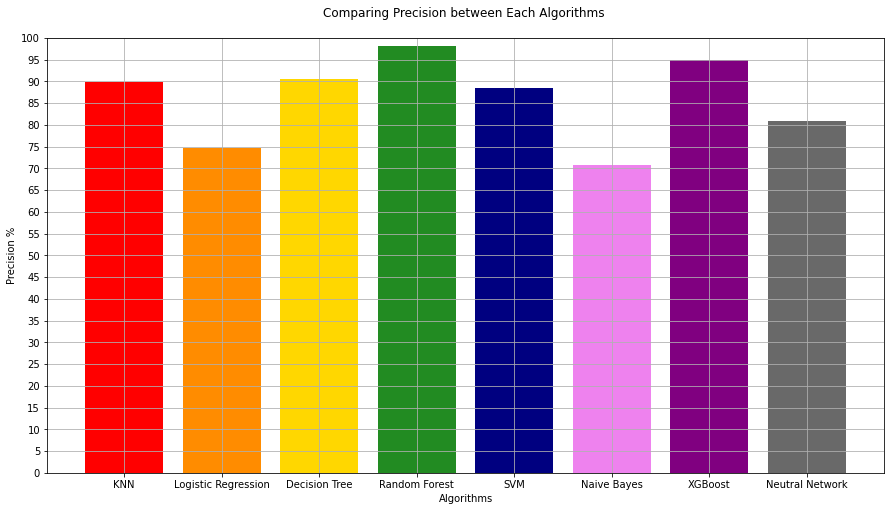

[89.89, 74.6, 90.46, 98.06, 88.47, 70.85, 95.03, 80.79]


In [304]:
plt.figure(figsize=(15,8))
plt.grid(True)
plt.bar(x=name, height=pre_all, color=['red','darkorange', 'gold','forestgreen','navy','violet','purple','dimgray'])
plt.xticks()
plt.ylim((0,100))
plt.yticks(np.arange(0,105,5))
plt.title("Comparing Precision between Each Algorithms \n")
plt.ylabel("Precision %")
plt.xlabel("Algorithms")
plt.show()
print(pre_all)


From the diagram, we can see that the precision of all the models used are 70% and above. Random Forest has the highest precision of 98.06%, while Naive Bayes has the lowest precision of 70.85%


## 5.3 Recall 
Recall refers to the percentage of total relevant results correctly classified by each algorithm. It is used to tell us how often the predictions capture the positive class. Recall is used to measure false negatives against true positives. False negatives are extremely significant when it comes to biomedical fields like predicting heart disease. The model is said to have low recall when the false negatives increase and the true positives decrease.


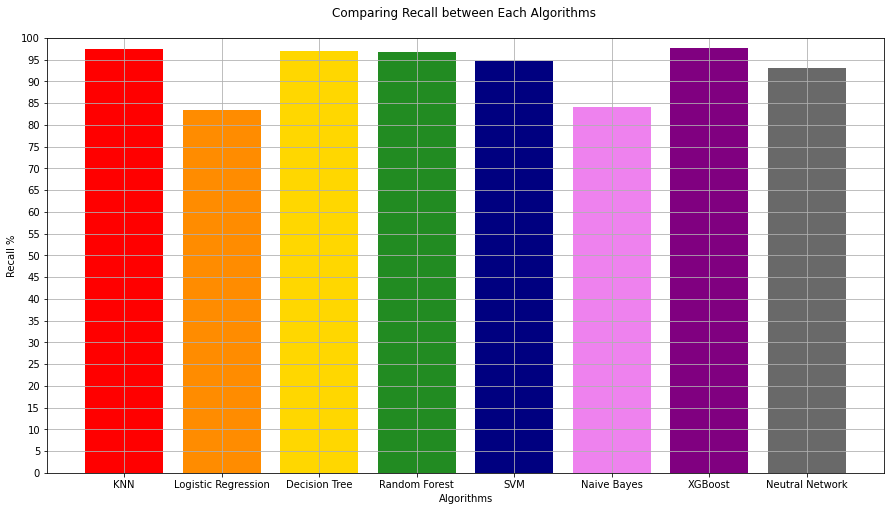

[97.55, 83.49, 96.91, 96.81, 94.78, 84.13, 97.76, 93.18]


In [402]:
plt.figure(figsize=(15,8))
# plt.grid(True)
plt.grid('on')
plt.bar(x=name, height=rec_all, color=['red','darkorange', 'gold','forestgreen','navy','violet','purple','dimgray'])
plt.xticks()
plt.ylim((0,100))
plt.yticks(np.arange(0,105,5))
plt.title("Comparing Recall between Each Algorithms \n")
plt.ylabel("Recall %")
plt.xlabel("Algorithms")
plt.show()

print(rec_all)

From the diagram, we can see that the recall of all the models used are more than 80%. XGBoost shows a recall of 97.76%. It is the highest among all the models. On the other hand, the model that has the lowest recall is Logistics Regression with 83.49%. The higher the recall, the more the positive class is being captured.

## 5.4 F1-Score
F1-score is the weighted average of recall and precision. Therefore, F1-score is used when the False Negatives and False Positives are crucial. F1-score is more useful than accuracy when there is any imbalanced data.


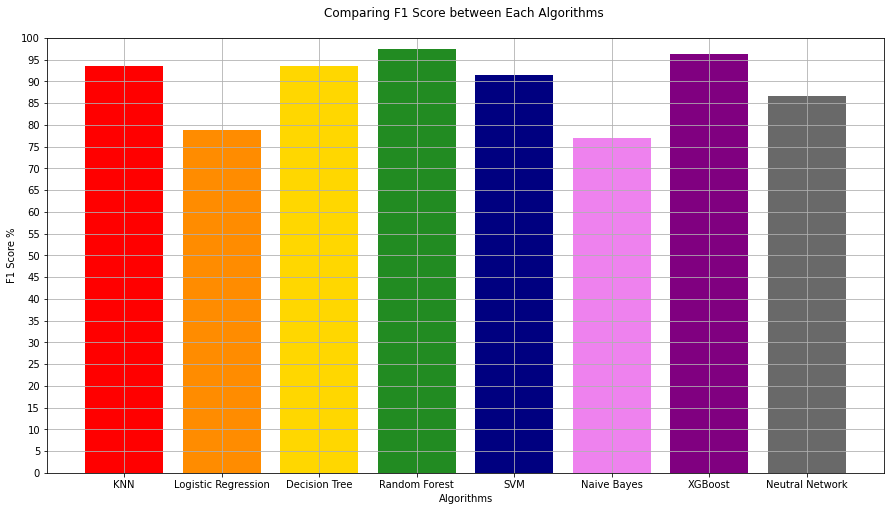

[93.56, 78.79, 93.57, 97.43, 91.52, 76.92, 96.38, 86.55]


In [305]:
plt.figure(figsize=(15,8))
plt.grid(True)
plt.bar(x=name, height=f1_all, color=['red','darkorange', 'gold','forestgreen','navy','violet','purple','dimgray'])
plt.xticks()
plt.ylim((0,100))
plt.yticks(np.arange(0,105,5))
plt.title("Comparing F1 Score between Each Algorithms \n")
plt.ylabel("F1 Score %")
plt.xlabel("Algorithms")
plt.show()
print(f1_all)

From the table, we can see that the F1-score of all the models used are more than 75%. The F1-score of Random Forest is 97.43%, which is the highest one as compared to other algorithms. While, Naive Bayesian (NB) has the lowest F1-score of 76.92%.


## 5.5 AUC 
AUC can be interpreted as the total area under the Receiver Operating Characteristic (ROC) curve. AUC measures the trade-off between the true positive rate and the false positive rate and it is measuring the entire two-dimensional area under the entire ROC curve (considering integration) from (0,0) to (1,1). For example, the higher the AUC, the better the model is at distinguishing between patients with or without heart disease.

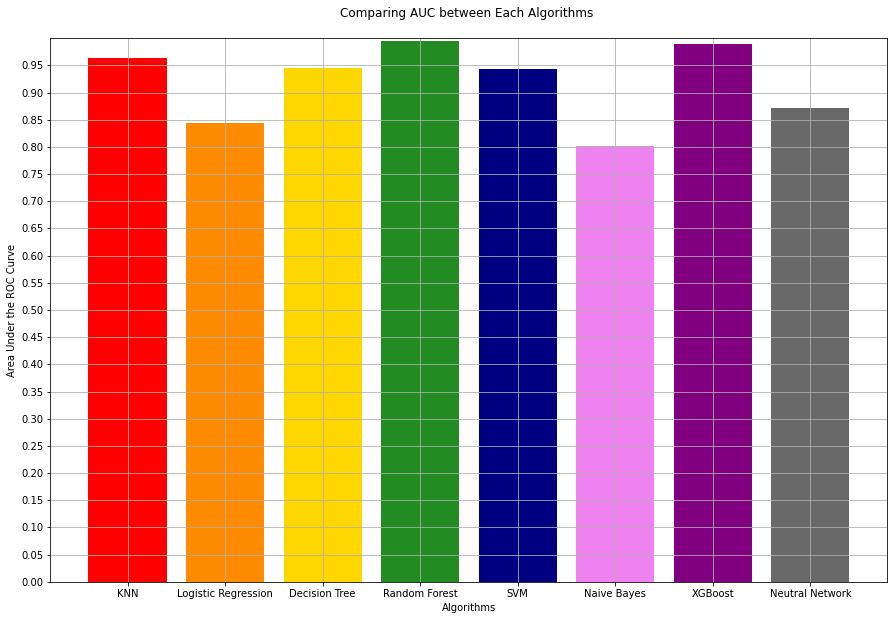

[0.964, 0.8443, 0.946029855056768, 0.9946244201368206, 0.9428891175249543, 0.8024353125394847, 0.9893842168913919, 0.8722558031443476]


In [306]:
plt.figure(figsize=(15,10))
plt.grid(True)
plt.bar(x=name, height=auc_all, color=['red','darkorange', 'gold','forestgreen','navy','violet','purple','dimgray'])
plt.xticks()
plt.ylim((0,1))
plt.yticks(np.arange(0,1,0.05))
plt.title("Comparing AUC between Each Algorithms \n")
plt.ylabel("Area Under the ROC Curve")
plt.xlabel("Algorithms")
plt.show()
print(auc_all)

From the table, we can see that the AUC of all the models used are more than 90%. Naive Bayesian (NB) has shown the highest AUC , that is 0.9680 while Logistics Regression (LR) has shown the lowest AUC with 0.9287.

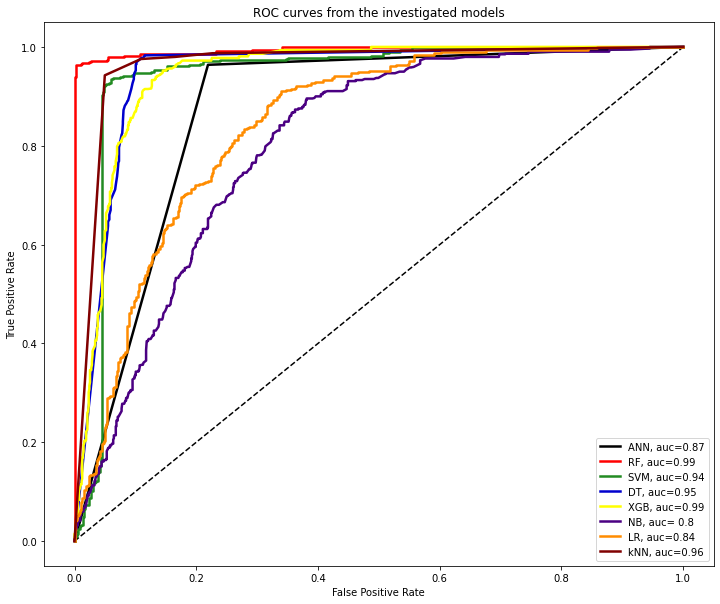

In [294]:
plt.figure(figsize=(12,10))

lw = 2.5
plt.plot([0, 1], [0, 1], 'k--')

# 'black', 'red', 'forestgreen', 'mediumblue', 'yellow','indigo','darkorange','maroon'

plt.plot(fpr_ann,tpr_ann,label="ANN, auc="+str(round(ann_roc_auc,2)),color='black',lw=lw)
plt.plot(fpr_rf,tpr_rf,label="RF, auc="+str(round(rf_auc,2)),color='red',lw=lw)
plt.plot(fpr_svm,tpr_svm,label="SVM, auc="+str(round(svm_roc_auc,2)),color='forestgreen',lw=lw)
plt.plot(fpr_dt,tpr_dt,label="DT, auc="+str(round(dt_auc,2)),color='mediumblue',lw=lw)
plt.plot(fpr_xgb,tpr_xgb,label="XGB, auc="+str(round(xgb_roc_auc,2)),color='yellow',lw=lw)
plt.plot(fpr_nb,tpr_nb,label="NB, auc= " + str(round(nb_roc_auc,2)),color='indigo',lw=lw)
plt.plot(fpr_lr,tpr_lr,label="LR, auc="+str(round(lr_auc,2)),color='darkorange',lw=lw)
plt.plot(fpr_knn,tpr_knn,label="kNN, auc="+str(round(knn_roc_auc,2)),color='maroon',lw=lw)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves from the investigated models')
plt.legend(loc='best')
plt.show()

## 5.6 Voting Classifier

In [308]:
# importing libraries
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [324]:
clf1 = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')
clf2 = LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=False,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=1e-05, verbose=0,
                   warm_start=False)
clf3 = GaussianNB(priors=None,var_smoothing = 0.2848035868435802)

clf4 = XGBClassifier(learning_rate =0.1,n_estimators=1000,gamma=0.5,max_depth=5,subsample=0.8,min_child_weight=5,colsample_bytree=1.0)
clf5 = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=25, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')
clf6 = SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)
clf7 = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=351, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=1456,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
clf8 = MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(10, 10, 10), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)
# ,
eclf = VotingClassifier(estimators=[('knn', clf1), ('lr', clf2), ('gnb', clf3), ('xgb', clf4),
                                     ('dtc', clf5), ('svc', clf6),
                                    ('rf', clf7), ('nn', clf8)], weights=[1,1,1,1,1,1,1,1,], voting='soft')
eclf = eclf.fit(X_train, y_train)
# calculate the auc score
print("Roc AUC: ", roc_auc_score(y_test, eclf.predict_proba(X_test)[:,1],
              average='macro'))
              
## # Submission
# probs = eclf.predict_proba(test)

# submission = pd.DataFrame({"ID":test_id, "TARGET": probs[:,1]})
# submission.to_csv("submission.csv", index=False)

Roc AUC:  0.9911689319687369


# Chapter 6 Conclusion 

![image](https://user-images.githubusercontent.com/67597246/115146184-008a6b80-a088-11eb-8f66-e7407b932669.png)

The table above shows the summary of the accuracy, recall and F1-score of the Random Forest as it is the best algorithm among all. The result of accuracy, recall and F1- score tend to be more important. 

First of all, the accuracy for Random Forest is the highest with 97.45% accuracy. This is probably due to the selection of the best hyperparameter in the gird search. Firstly, we are using the Randomised Search CV to randomly pick the best parameter in a range of values. After running it, we can conclude that the best parameters for the Randomised Search CV are “entropy” criterion, “351” max_depth, “sqrt”max_features, “1” min_samples_leaf, “2” min_samples_split and “1656 ”n_estimators. After that, we apply the best parameter list generated from Randomised Search CV into the Grid Search CV and to determine the better parameters. Hence, with the best parameter list, Random Forest manages to get the highest accuracy among all the modelling and it can handle large numbers of features due to the embedded feature selection in the model generation process which appears to get the results of 97.45% accuracy when we tested with our datasets. Normally, Random Forest will provide highest accuracy compared with other algorithms, this is because it is more powerful and works correctly for the large range of data items than decision trees. The more the trees, the higher the accuracy is.

Besides, Recall is also quite useful and important in making a prediction on whether the patients have stroke disease or not. High recall means low false negative rate. In other words, high recall will return correct results most of the time and it is often paired with a human expert to filter out the false positive. In the biomedical science field, false negative means the system predicts that the patients do not have stroke  but end up the diagnosis is wrong. This is indeed a very serious mistake and must be eliminated as much as it can. Based on our study, we found that the Random Forest model produces the third highest recall value which is as high as 96.81%. This is because the Random Forest has higher false negative value and lower true positive. 

Lastly, we calculate the F1-score in order to evaluate the algorithm. F1-score incorporates both precision and recall into a single metric. It is usually more useful than accuracy. High F1-score indicates that the model has a very good performance. In order to calculate F1-score, we need to take the values of the precision and recall. The model with the highest F1-score is Random Forest with 97.43%. It is because Random Forest has a very high accuracy and recall. Therefore, after evaluating the accuracy, recall and F1-score of each model, we can conclude that Random Forest is the best algorithm to apply in this study for making the prediction and analysis of stroke disease.